# Evaluate SCHOLAR results

In [1]:
import os, sys, scipy, json
from scipy import sparse
import codecs
import numpy as np
import pandas as pd
import file_handling as fh
import matplotlib.pyplot as plt
import seaborn as sns

# Select target variable

In [34]:
dtm = np.load(data_dir+"scholar_alltext_traindev/dev.npz")

In [45]:
temp = fh.load_sparse(data_dir+"scholar_alltext_traindev/dev.npz").todense()
n_items, temp_size = temp.shape

In [47]:
temp.shape

(2930, 2034)

In [49]:
a = True

In [50]:
if a == True: print("yes")

yes


In [2]:
# gdp | cpi | u
target = "gdp"
# all_gb_texts | gdp_text,...
text_type = "all_gb_texts"

In [32]:
if sys.platform == "darwin":
    pass
else:
    input_dir = "/nfs/home/maxa/results/"+"mp_speeches"+'/'+text_type+"/"+target+"_target/"+"traindev/"    
    data_dir = "/nfs/home/maxa/data/mp_speeches/" 
print(input_dir)

/nfs/home/maxa/results/mp_speeches/all_gb_texts/gdp_target/traindev/


In [4]:
# load and merge timestamps - greenbook
df_gb = pd.read_csv(os.path.join(data_dir,"gb_dtm+data/REGALLTEXT_gb_dataset.csv"), index_col = 0)
gb_dates = []
for dd in df_gb.meet_date.values:
    gb_dates.append(dd[:-3])

In [5]:
# load and merge timestamps - speeches
df_sp = pd.read_csv(os.path.join(data_dir,"speeches_dtm+data/speeches_metadata_tfidf17.csv"), index_col = 0)
gb_dates_sp = []
for dd in df_sp.gb_date.values:
    gb_dates_sp.append(dd[:-3])

# Select model for evaluation

In [26]:
k = 10
bz = 75 
run = "ep5000_run3" 
model = "k"+str(k)+"/bz"+str(bz)+"/"+run+"/"
model_path = input_dir + model
print(model)
print(model_path)

k10/bz75/ep5000_run3/
/nfs/home/maxa/results/mp_speeches/all_gb_texts/gdp_target/traindev/k10/bz75/ep5000_run3/


In [27]:
model_output = model_path + "eval/"
try:
    os.mkdir(model_output)
except:
    pass

In [28]:
model_output

'/nfs/home/maxa/results/mp_speeches/all_gb_texts/gdp_target/traindev/k10/bz75/ep5000_run3/eval/'

# Predictive R^2

In [29]:
pR_gb = pd.read_csv(os.path.join(model_path,"train_pR2.csv"),index_col = 0)
pR_sp = pd.read_csv(os.path.join(model_path,"dev_eval_pR2.csv"),index_col = 0)

In [30]:
print("pr2 in Greenbooks:", round(pR_gb.values[0][0],4))
print("pr2 in Speeches:", round(pR_sp.values[0][0],4))

pr2 in Greenbooks: -0.7288
pr2 in Speeches: -1.2362


# Topic regression chart

In [11]:
regcoefs = pd.read_csv(os.path.join(model_path,"best_val_regression_weights.csv"), index_col  = 0)
topicdata =  pd.read_table(os.path.join(model_path,"topics_unweighted.txt"), header = None)
topicdata.columns = ["topwords_all"]
topiccoefs = regcoefs[:k]
covarcoefs = regcoefs[k:]

In [12]:
n_topwords = 10
top_n = []
for topic in topicdata.topwords_all:
    top_n.append(" ".join(topic.split(" ")[:n_topwords]))
topicdata["topwords"] = top_n

In [13]:
topicdata["coefs"] = topiccoefs
topicdata.sort_values(by = "coefs", ascending = False)

topwords_all  \
2  governance attacks dual interests evolve how w...   
4  structured optimal headwinds turmoil stress gu...   
6  speeches taylor equilibrium damage checks disr...   
7  meant whatever approaches allocation comprehen...   
3  pp essential innovative lender sa accord livin...   
8  february presidents crossborder effectiveness ...   
1  weve sophisticated college clearing responsibi...   
9  nontraditional san regulations subprime minute...   
5  study boston bear presidents challenges credit...   
0  skills guide minimize supervision weve posed p...   

                                            topwords     coefs  
2  governance attacks dual interests evolve how w...  3.624223  
4  structured optimal headwinds turmoil stress gu...  1.328035  
6  speeches taylor equilibrium damage checks disr...  0.625391  
7  meant whatever approaches allocation comprehen...  0.412911  
3  pp essential innovative lender sa accord livin... -0.021220  
8  february presidents crossborder effectiveness ... -0.341155  
1  weve sophisticated college clearing responsibi... -1.099418  
9  nontraditional san regulations subprime minute... -1.136265  
5  study boston bear presidents challenges credit... -1.354715  
0  skills guide minimize supervision weve posed p... -2.043037

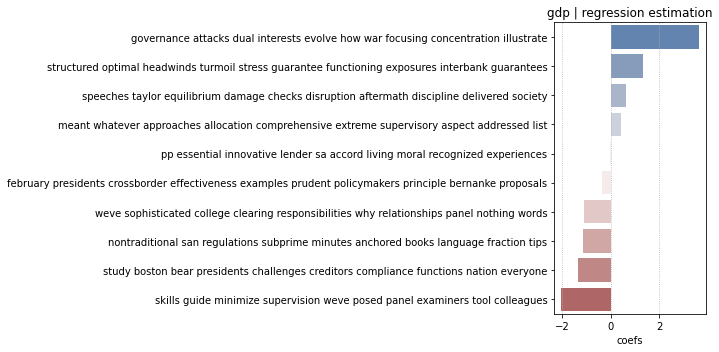

In [14]:
width = 10
height = 5
data = topicdata.sort_values(by = "coefs", ascending = False)
f, ax = plt.subplots(figsize=(width, height))
sns.barplot(x = data.coefs, y = data.topwords,  palette="vlag", orient = "h")
# Tweak the visual presentation
ax.xaxis.grid(True, linestyle=":")
ax.set(ylabel="")
#sns.despine(trim=True, left=True)
plt.title("{} | regression estimation".format(target))
plt.tight_layout()
plt.savefig(os.path.join(model_output, "{}_gb_topic_regression_chart.pdf".format(target)))

# Topics over time

In [15]:
theta_gb = pd.DataFrame(np.load(os.path.join(model_path,"theta.train.npz"))["theta"])
theta_gb.index = gb_dates

In [16]:
topicdata.T

0  \
topwords_all  skills guide minimize supervision weve posed p...   
topwords      skills guide minimize supervision weve posed p...   
coefs                                                  -2.04304   

                                                              1  \
topwords_all  weve sophisticated college clearing responsibi...   
topwords      weve sophisticated college clearing responsibi...   
coefs                                                  -1.09942   

                                                              2  \
topwords_all  governance attacks dual interests evolve how w...   
topwords      governance attacks dual interests evolve how w...   
coefs                                                   3.62422   

                                                              3  \
topwords_all  pp essential innovative lender sa accord livin...   
topwords      pp essential innovative lender sa accord livin...   
coefs                                                -0.0212205   

                                                              4  \
topwords_all  structured optimal headwinds turmoil stress gu...   
topwords      structured optimal headwinds turmoil stress gu...   
coefs                                                   1.32804   

                                                              5  \
topwords_all  study boston bear presidents challenges credit...   
topwords      study boston bear presidents challenges credit...   
coefs                                                  -1.35471   

                                                              6  \
topwords_all  speeches taylor equilibrium damage checks disr...   
topwords      speeches taylor equilibrium damage checks disr...   
coefs                                                  0.625391   

                                                              7  \
topwords_all  meant whatever approaches allocation comprehen...   
topwords      meant whatever approaches allocation comprehen...   
coefs                                                  0.412911   

                                                              8  \
topwords_all  february presidents crossborder effectiveness ...   
topwords      february presidents crossborder effectiveness ...   
coefs                                                 -0.341155   

                                                              9  
topwords_all  nontraditional san regulations subprime minute...  
topwords      nontraditional san regulations subprime minute...  
coefs                                                  -1.13627

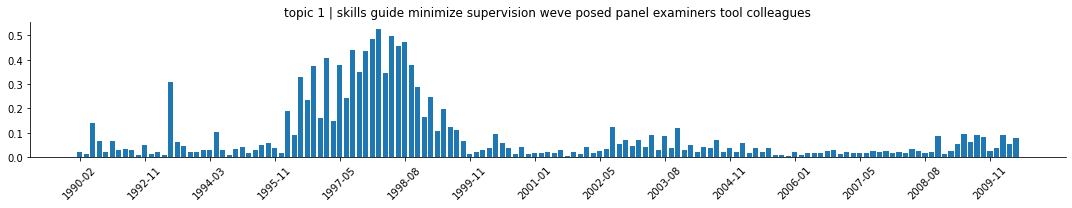

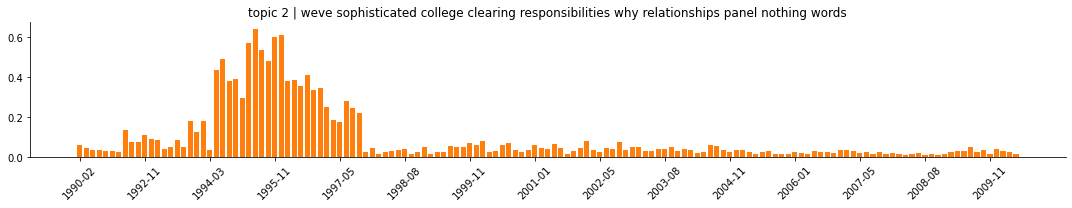

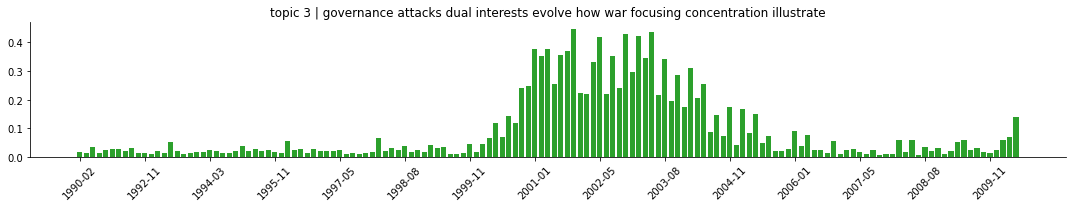

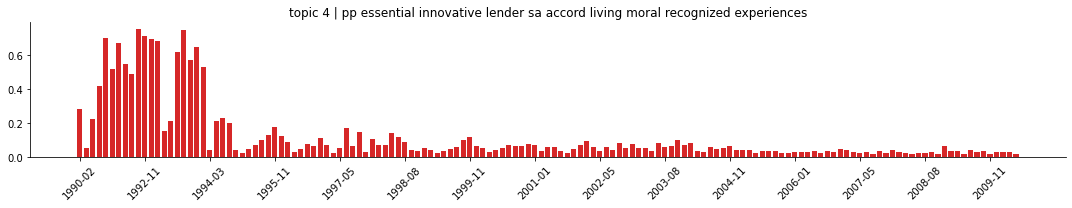

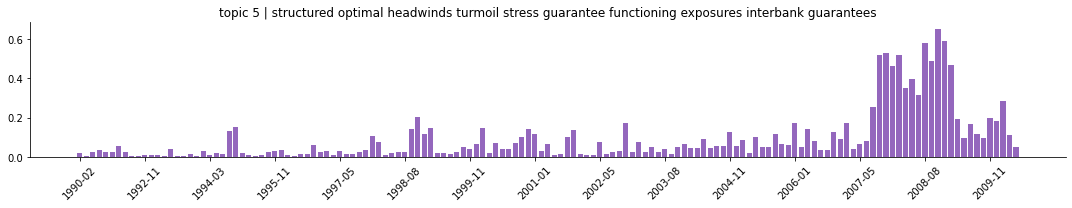

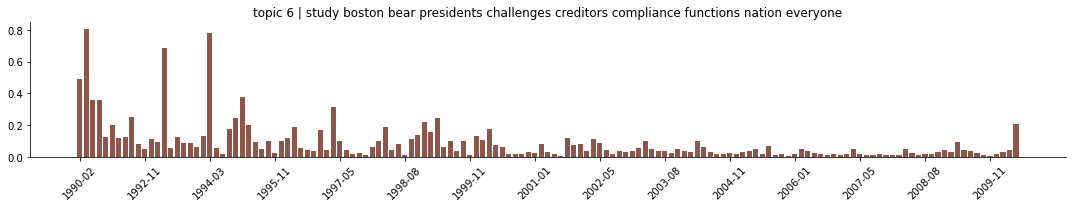

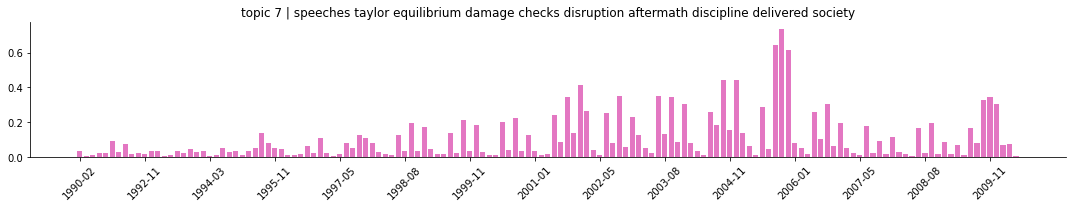

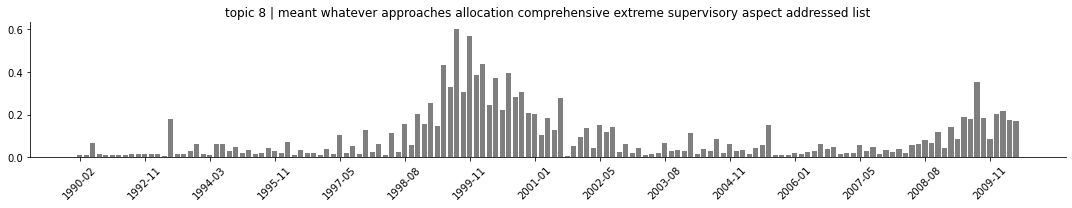

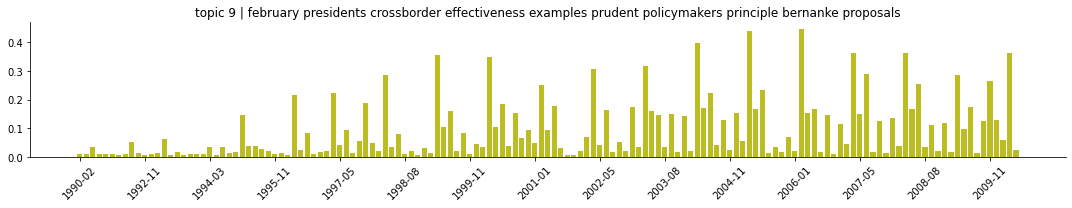

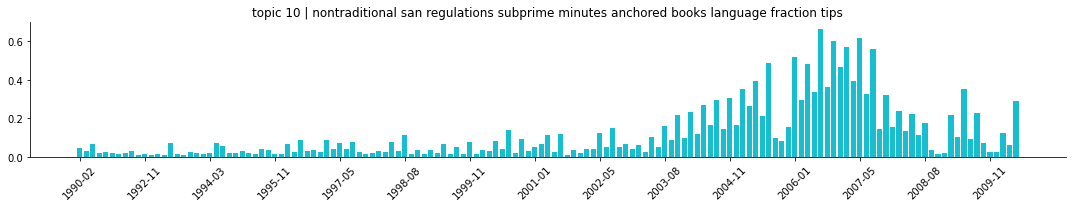

In [19]:
width = 15
height= 3
freq = 10
rotation = 45
for topic,color in zip(theta_gb.columns,sns.color_palette()):
    fig = plt.figure(figsize=(width,height))
    plt.bar(theta_gb.index, theta_gb[topic],width=.8, color = color)
    plt.xticks(theta_gb.index[::freq], rotation=rotation)
    plt.title("topic {} | {}".format(topic +1,topicdata.topwords[topic]))
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.tight_layout()
    plt.savefig(os.path.join(model_output,"{}_topic{}_gb_timeseries.pdf".format(target,topic+1)))

# Target gb timeseries 

In [20]:
# load y data - actual and predicted
df_y = pd.read_csv(os.path.join(model_path,"dev_eval_y_actuals.csv"),index_col = 0)
df_ypred = pd.read_csv(os.path.join(model_path,"dev_eval_y_predictions.csv"),index_col = 0)
res_y = df_y - df_ypred

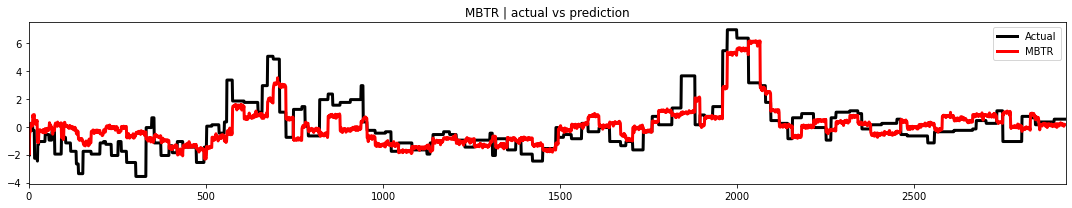

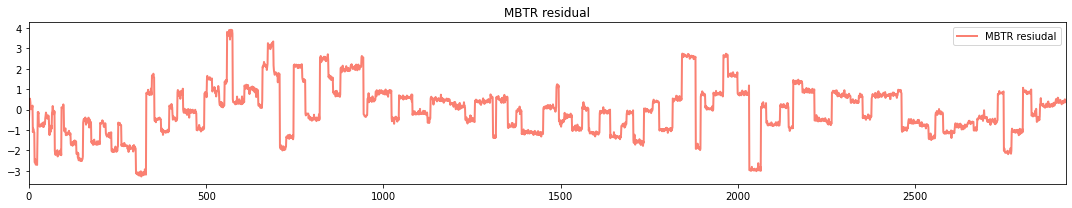

In [22]:
width = 15
height = 3
# plot
names = ["","_res-mbtr"]
for idx  in range(2):
    fig = plt.figure(figsize=(width,height))
    if idx == 0:
        plt.plot(df_y.values, color = "black",linewidth = 3)
        plt.plot(df_ypred.values, color = "red",linewidth = 3)
        plt.legend(["Actual","MBTR"])
        plt.title("MBTR | actual vs prediction")        
    else:
        #plt.plot(df_y.values, color = "black",linewidth = 3)
        plt.plot(res_y.values, color = "salmon", linestyle = "-", linewidth = 2)
        plt.legend(["MBTR resiudal"])   
        plt.title("MBTR residual")
    plt.margins(x=0)
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.tight_layout()
    #ry:
    plt.savefig(os.path.join(model_output,'{}_yplot{}.pdf').format(target,names[idx]))
    #except:
        #os.mkdir(os.path.join(model_output,"figures"))
    #    plt.savefig(os.path.join(model_path,'{}_yplot{}.pdf').format(target,names[idx]))
    plt.show()

# Speech dispersion

In [23]:
theta_sp =  pd.DataFrame(np.load(os.path.join(model_path,"theta.dev.npz"))["theta"])
try:
    theta_sp.index = gb_dates_sp
except:
    pass

### Speech topics over time

In [24]:
theta_sp

0         1         2         3         4         5         6  \
0     0.184762  0.073251  0.058437  0.069495  0.095582  0.107069  0.118694   
1     0.143431  0.080352  0.079417  0.062024  0.085174  0.103554  0.088432   
2     0.128738  0.066600  0.120503  0.066706  0.095803  0.087963  0.097067   
3     0.147678  0.086245  0.093972  0.061115  0.092656  0.115759  0.113002   
4     0.207158  0.050196  0.088029  0.119203  0.076321  0.129010  0.082127   
...        ...       ...       ...       ...       ...       ...       ...   
2923  0.125604  0.072721  0.131355  0.069644  0.093115  0.098476  0.112583   
2924  0.119460  0.074756  0.128167  0.058795  0.085468  0.077917  0.101031   
2925  0.119153  0.079803  0.129786  0.057227  0.088239  0.082772  0.094988   
2926  0.122573  0.073502  0.133803  0.063989  0.088100  0.082357  0.098123   
2927  0.124029  0.080635  0.125713  0.060789  0.089951  0.080513  0.100025   

             7         8         9  
0     0.142862  0.109288  0.040559  
1     0.160589  0.119926  0.077101  
2     0.141250  0.113374  0.081995  
3     0.137297  0.076768  0.075509  
4     0.132443  0.052881  0.062632  
...        ...       ...       ...  
2923  0.119880  0.082630  0.093994  
2924  0.132750  0.118136  0.103518  
2925  0.134489  0.110896  0.102647  
2926  0.125036  0.108275  0.104241  
2927  0.134741  0.105829  0.097775  

[2928 rows x 10 columns]

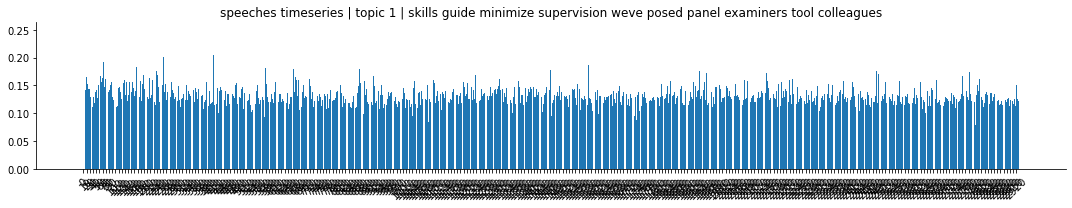

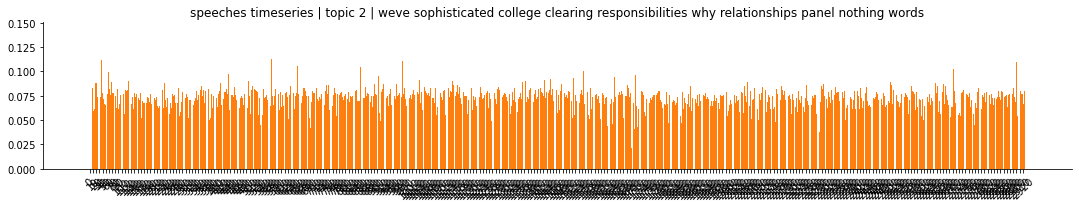

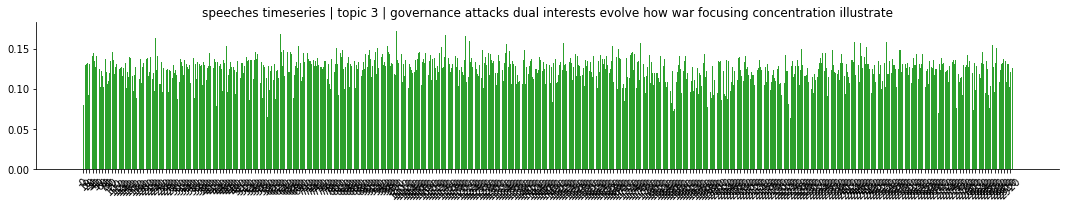

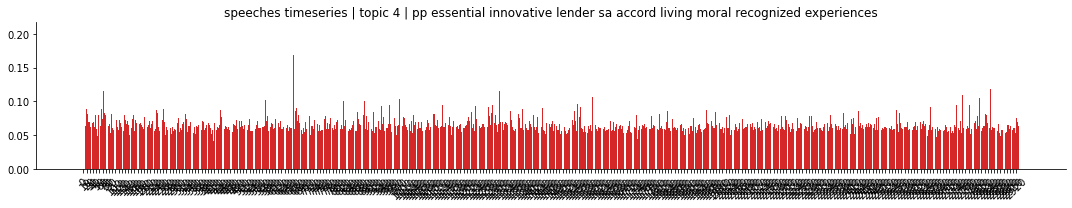

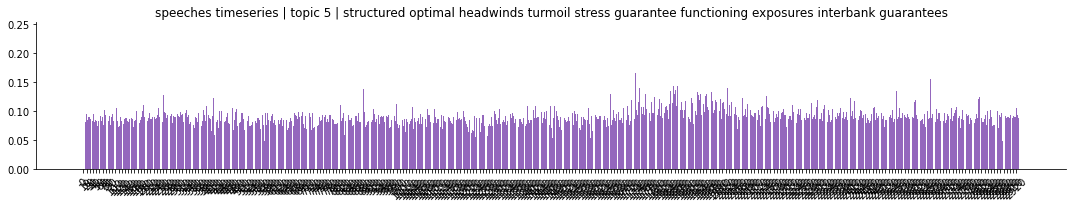

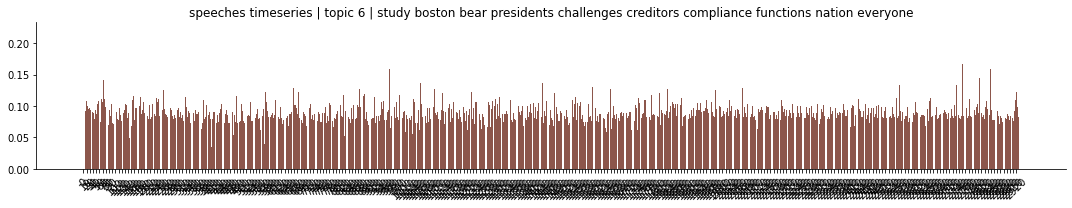

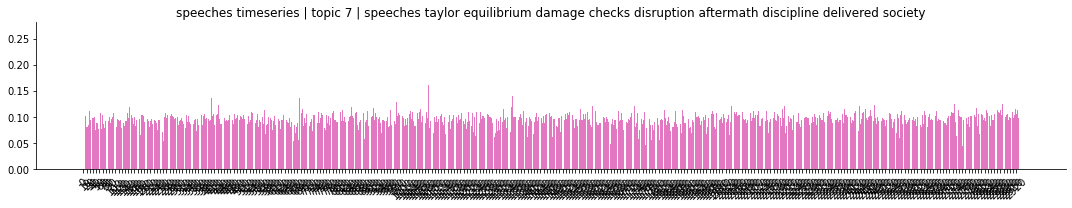

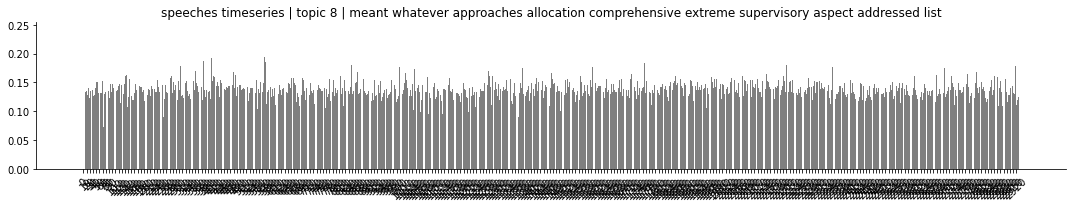

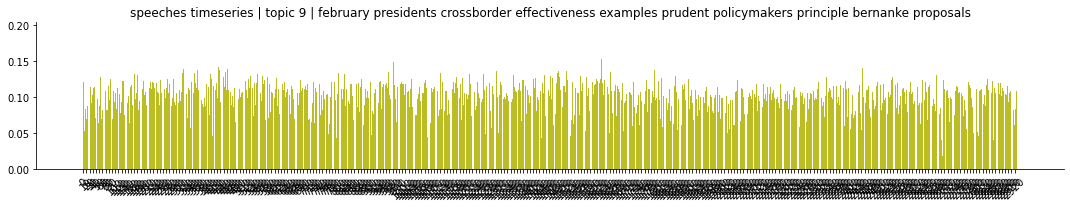

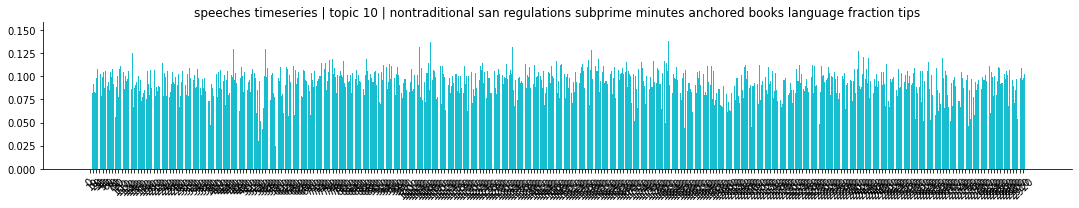

In [25]:
width = 15
height= 3
freq = 10
rotation = 45
for topic,color in zip(theta_sp.columns,sns.color_palette()):
    fig = plt.figure(figsize=(width,height))
    plt.bar(theta_sp.index, theta_sp[topic],width=.8, color = color)
    plt.xticks(theta_sp.index[::freq], rotation=rotation)
    plt.title("speeches timeseries | topic {} | {}".format(topic +1,topicdata.topwords[topic]))
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.tight_layout()
    plt.savefig(os.path.join(model_output,"{}_topic{}_speeches_timeseries.pdf".format(target,topic+1)))

### Plot residuals

<Figure size 720x216 with 0 Axes>

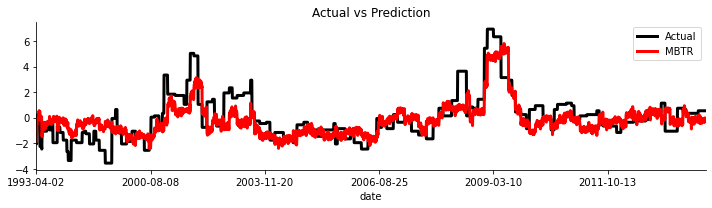

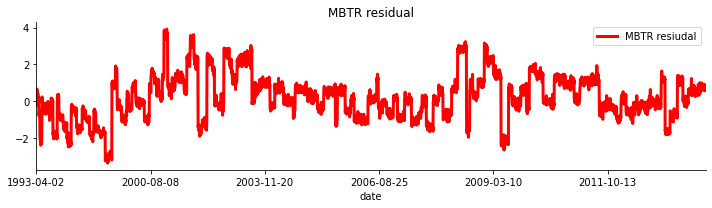

In [183]:
plot_y_timeseries(model_path, speeches_metadata_path, save = True, width=10, height=3)

## Create comprehensive dataset

In [184]:
df_speeches = pd.read_pickle("/Users/maximilianahrens/OneDrive - Nexus365/Michael and Max/Data/speeches_db/speeches_database.pkl")
df_speeches.date = df_speeches.date.astype(str)
df_speeches = df_speeches.sort_values("date",ascending = True)
df_speeches.reset_index(drop = True, inplace = True)
df_speeches.head(3)

date branch   speaker  \
0  1993-04-02    RIC  broaddus   
1  1995-03-16    RIC  broaddus   
2  1996-01-11     NY        sp   

                                                text  
0  Thank you very much for that kind introduction...  
1  It is a pleasure and indeed an honor to be wit...  
2  I am pleased to be here this morning to addres...

In [185]:
df_zbars = pd.read_csv(os.path.join(model_path,"speeches_zbars.csv"),index_col = False)
# name topics (raw order)
df_zbars.columns = ["topic {}".format(n+1) for n in range(df_zbars.shape[1])]
# reorder topics according to original effect in gb-mapping
df_zbars = df_zbars.reindex(columns=order_ids[0])
# relabel topics according to gb-mapping order
df_zbars.columns = ["topic {}".format(n+1) for n in range(df_zbars.shape[1])]

In [186]:
df_y = pd.read_csv(os.path.join(model_path,"speeches_y_df.csv"),index_col = False)
df_y.columns = ["y_actual","y_speech_implied"]

In [187]:
df_speech_results = pd.concat([df_y, df_zbars],axis = 1) 
df_speech_results = pd.concat([df_speech_results, speeches_metadata],axis = 1)

In [188]:
df_speech_results["text"] = df_speeches[:df_speech_results.shape[0]].text

In [189]:
# reorder columns
cols_org = df_speech_results.columns.values
cols_new = ["date",'gb_date',"fomc_date",'branch', 'speaker', "text", 'info_gap','y_actual', 'y_speech_implied', 'topic 1', 'topic 2', 'topic 3',
       'topic 4', 'topic 5', 'topic 6', 'topic 7', 'topic 8', 'topic 9',
       'topic 10', 'yq', 'unemp0', 'unemp1', 'unemp2',
       'unemp3', 'unemp4', 'cpi0', 'cpi1', 'cpi2', 'cpi3', 'cpi4',
       'cpix0', 'cpix1', 'cpix2', 'cpix3', 'cpix4', 'rgdp0', 'rgdp1',
       'rgdp2', 'rgdp3', 'rgdp4', 'pgdp0', 'pgdp1', 'pgdp2', 'pgdp3',
       'pgdp4', 'hq0', 'hq1', 'hq2', 'hq3', 'hq4', 'unemp_updt0',
       'unemp_updt1', 'unemp_updt2', 'unemp_updt3', 'cpi_updt0',
       'cpi_updt1', 'cpi_updt2', 'cpi_updt3', 'cpix_updt0', 'cpix_updt1',
       'cpix_updt2', 'cpix_updt3', 'rgdp_updt0', 'rgdp_updt1',
       'rgdp_updt2', 'rgdp_updt3', 'pgdp_updt0', 'pgdp_updt1',
       'pgdp_updt2', 'pgdp_updt3', 'unemp_fe1', 'unemp_fe2', 'unemp_fe3',
       'unemp_fe4', 'cpi_fe1', 'cpi_fe2', 'cpi_fe3', 'cpi_fe4',
       'cpix_fe1', 'cpix_fe2', 'cpix_fe3', 'cpix_fe4', 'rgdp_fe1',
       'rgdp_fe2', 'rgdp_fe3', 'rgdp_fe4', 'pgdp_fe1', 'pgdp_fe2',
       'pgdp_fe3', 'pgdp_fe4', 'L1unemp0', 'L1unemp1', 'L1unemp2',
       'L1unemp3', 'L1unemp4', 'L1cpi0', 'L1cpi1', 'L1cpi2', 'L1cpi3',
       'L1cpi4', 'L1cpix0', 'L1cpix1', 'L1cpix2', 'L1cpix3', 'L1cpix4',
       'L1rgdp0', 'L1rgdp1', 'L1rgdp2', 'L1rgdp3', 'L1rgdp4', 'L1pgdp0',
       'L1pgdp1', 'L1pgdp2', 'L1pgdp3', 'L1pgdp4', 'L1hq0', 'L1hq1',
       'L1hq2', 'L1hq3', 'L1hq4', 'L1unemp_updt0', 'L1unemp_updt1',
       'L1unemp_updt2', 'L1unemp_updt3', 'L1cpi_updt0', 'L1cpi_updt1',
       'L1cpi_updt2', 'L1cpi_updt3', 'L1cpix_updt0', 'L1cpix_updt1',
       'L1cpix_updt2', 'L1cpix_updt3', 'L1rgdp_updt0', 'L1rgdp_updt1',
       'L1rgdp_updt2', 'L1rgdp_updt3', 'L1pgdp_updt0', 'L1pgdp_updt1',
       'L1pgdp_updt2', 'L1pgdp_updt3', 'L1unemp_fe1', 'L1unemp_fe2',
       'L1unemp_fe3', 'L1unemp_fe4', 'L1cpi_fe1', 'L1cpi_fe2',
       'L1cpi_fe3', 'L1cpi_fe4', 'L1cpix_fe1', 'L1cpix_fe2', 'L1cpix_fe3',
       'L1cpix_fe4', 'L1rgdp_fe1', 'L1rgdp_fe2', 'L1rgdp_fe3',
       'L1rgdp_fe4', 'L1pgdp_fe1', 'L1pgdp_fe2', 'L1pgdp_fe3',
       'L1pgdp_fe4']
df_speech_results = df_speech_results[cols_new]

In [190]:
# adjust for misspelled speaker names
speaker_adj = []
for speaker in df_speech_results.speaker:
    if speaker == "Bernanke2":
        speaker_adj.append("Bernanke")
    elif speaker == "Ferguson2":
        speaker_adj.append("Ferguson")
    elif speaker == "Greenspan2" or speaker == "Greenspan3":
        speaker_adj.append("Greenspan")
    elif speaker == "Rivlin2":
        speaker_adj.append("Rivlin")
    else:
        speaker_adj.append(speaker)

In [191]:
df_speech_results["speaker"] = speaker_adj

In [123]:
df_speech_results.to_pickle(output_dir+"/speech_results/speeches_"+target+"/speeches_"+target+"_signal.pkl")

In [124]:
df_speech_results.to_excel(output_dir+"/speech_results/speeches_"+target+"/speeches_"+target+"_signal.xlsx")

## Plot speeches signals

actual_series = df_speech_results[["date","y_actual"]]
actual_series

a = actual_series.merge(data, on = "date", how = "left")
#plt.plot(a.y_actual_x)
plt.plot(a.y_actual_y)

## All speakers

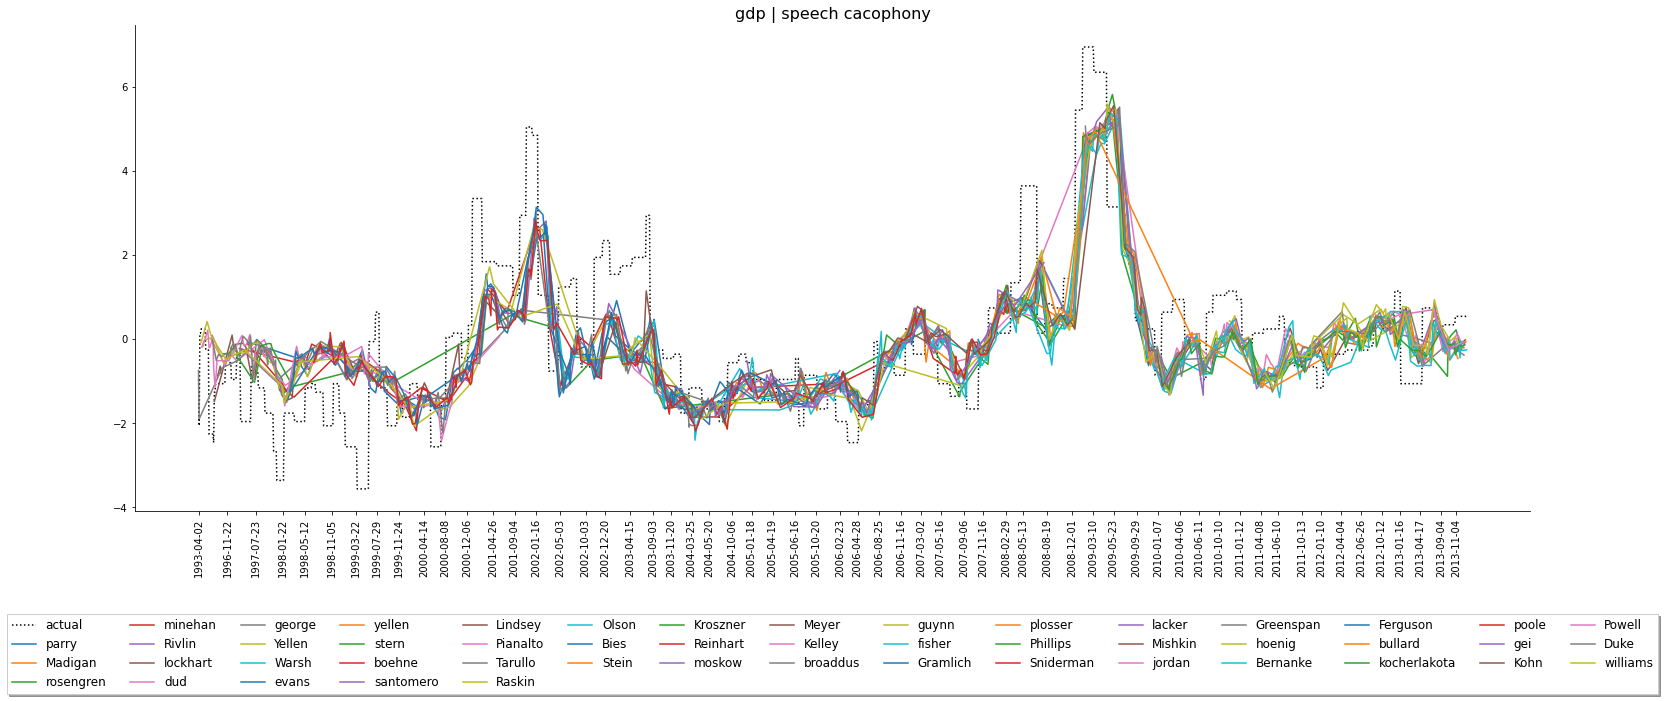

In [192]:
if target =="u":
    name = "unemployment"
else:
    name = target
speakers_list = set(df_speech_results.speaker) - set(["mc","mcd",np.nan,"pdf","sp"]) #all
color_multiplier = int(np.ceil(len(speakers_list)/len(sns.color_palette())))
plt.figure(figsize=(24,10))
plt.plot(df_speech_results.date, df_speech_results.y_actual, label = "actual", color = "black", linestyle = ":")
for speaker ,color in zip(speakers_list,sns.color_palette()*color_multiplier):
    data = df_speech_results[df_speech_results.speaker == speaker]
    plt.plot(data.date, data.y_speech_implied, color = color, label = speaker)
plt.xticks(df_speech_results.date[::50], rotation=90)
plt.title("{} | speech cacophony".format(name), fontsize = 16)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=False, shadow=True, ncol=15, fontsize = 12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig("/Users/maximilianahrens/OneDrive - Nexus365/Michael and Max/Output_speeches/speech_results/speeches_"+target+"/"+target+"_speech_cacophony_allspeakers.pdf")
plt.show()

## Selected speakers

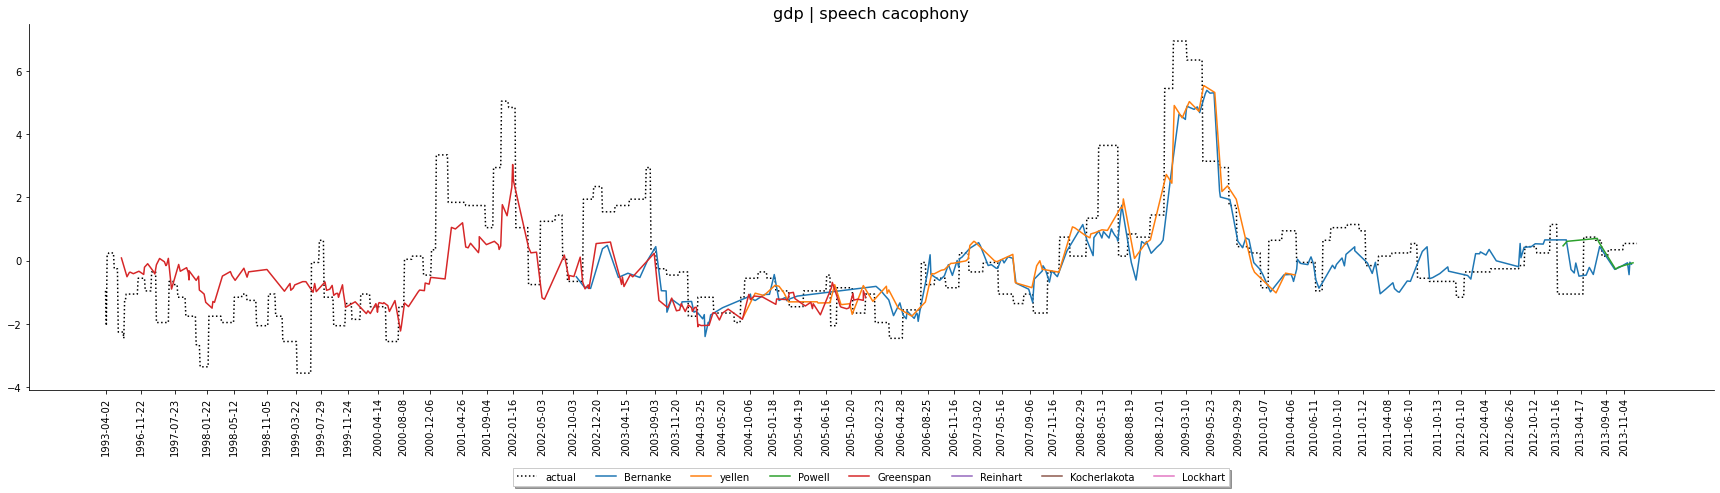

In [193]:
if target =="u":
    name = "unemployment"
else:
    name = target
speakers_list = ["Bernanke","yellen", "Powell","Greenspan","Reinhart","Kocherlakota","Lockhart"]
color_multiplier = int(np.ceil(len(speakers_list)/len(sns.color_palette())))
plt.figure(figsize=(24,7))
plt.plot(df_speech_results.date, df_speech_results.y_actual, label = "actual", color = "black", linestyle = ":")
for speaker ,color in zip(speakers_list,sns.color_palette()*color_multiplier):
    data = df_speech_results[df_speech_results.speaker == speaker]
    plt.plot(data.date, data.y_speech_implied, color = color, label = speaker)
plt.xticks(df_speech_results.date[::50], rotation=90)
plt.title("{} | speech cacophony".format(name), fontsize = 16)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=False, shadow=True, ncol=15)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig("/Users/maximilianahrens/OneDrive - Nexus365/Michael and Max/Output_speeches/speech_results/speeches_"+target+"/"+target+"_speech_cacophony_selectedspeakers.pdf")
plt.show()

## Dispersion chart

In [194]:
disp_format = df_speech_results.groupby('gb_date')['y_speech_implied']
disp = df_speech_results.assign(min=disp_format.transform(min), max=disp_format.transform(max))

In [195]:
df_disp = disp.groupby("gb_date")["min","max","y_actual"].first()
df_disp.columns = ["min_signal","max_signal","y_actual"]
df_disp["dispersion"] = df_disp.max_signal - df_disp.min_signal

/Users/maximilianahrens/opt/anaconda3/envs/nlp1/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


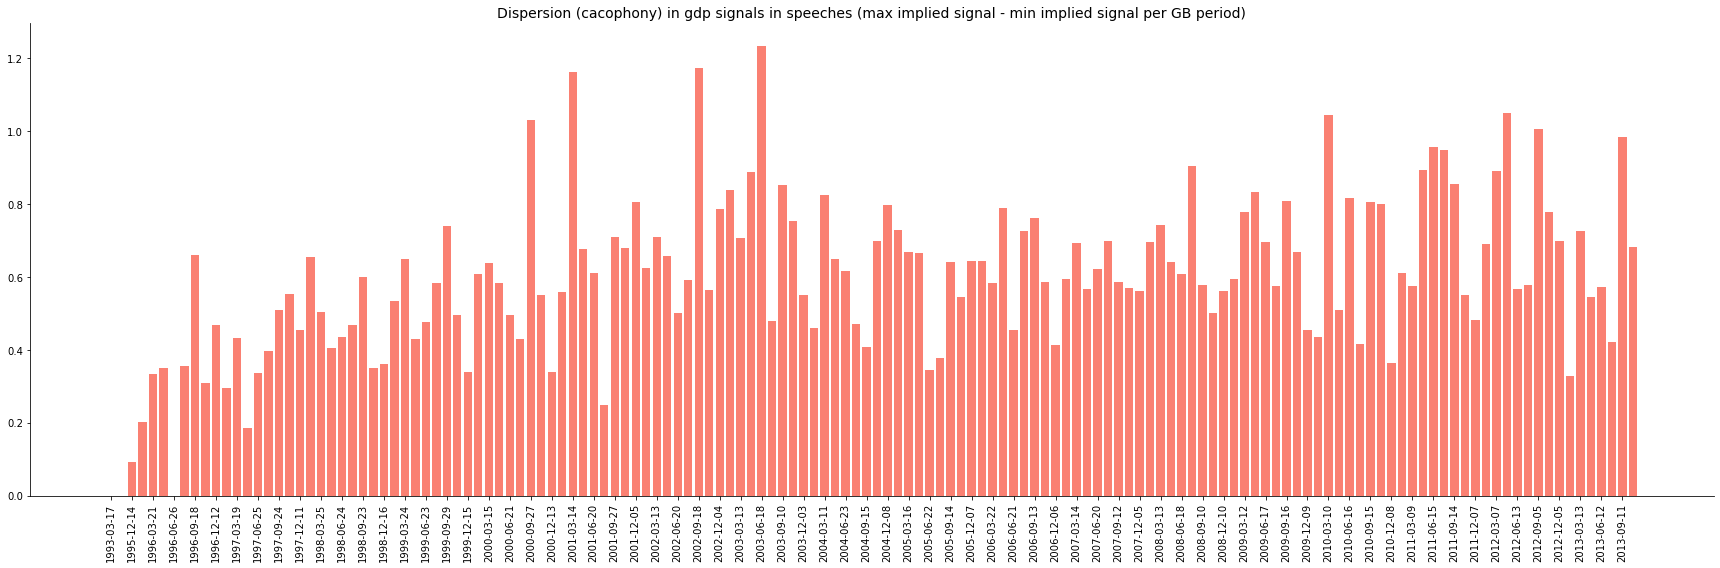

In [196]:
if target == "cpi":
    color = "green"
    alpha = 0.6
    name = target
elif target =="gdp":
    color = "salmon"
    alpha = 1.0
    name = target
elif target =="u":
    color = "purple"
    alpha = 0.8
    name = "unemployment"
plt.figure(figsize=(24,8))
plt.bar(df_disp.index, df_disp.dispersion, color = color,alpha = alpha)
#plt.plot(df_disp.index, df_disp.y_actual, color = "black", linestyle = ":")
plt.xticks(df_disp.index[::2], rotation=90)
plt.title("Dispersion (cacophony) in {} signals in speeches (max implied signal - min implied signal per GB period)".format(name), fontsize = 14)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig("/Users/maximilianahrens/OneDrive - Nexus365/Michael and Max/Output_speeches/speech_results/speeches_"+target+"/"+target+"_speech_signal_dispersion_barchart.pdf")
plt.show()

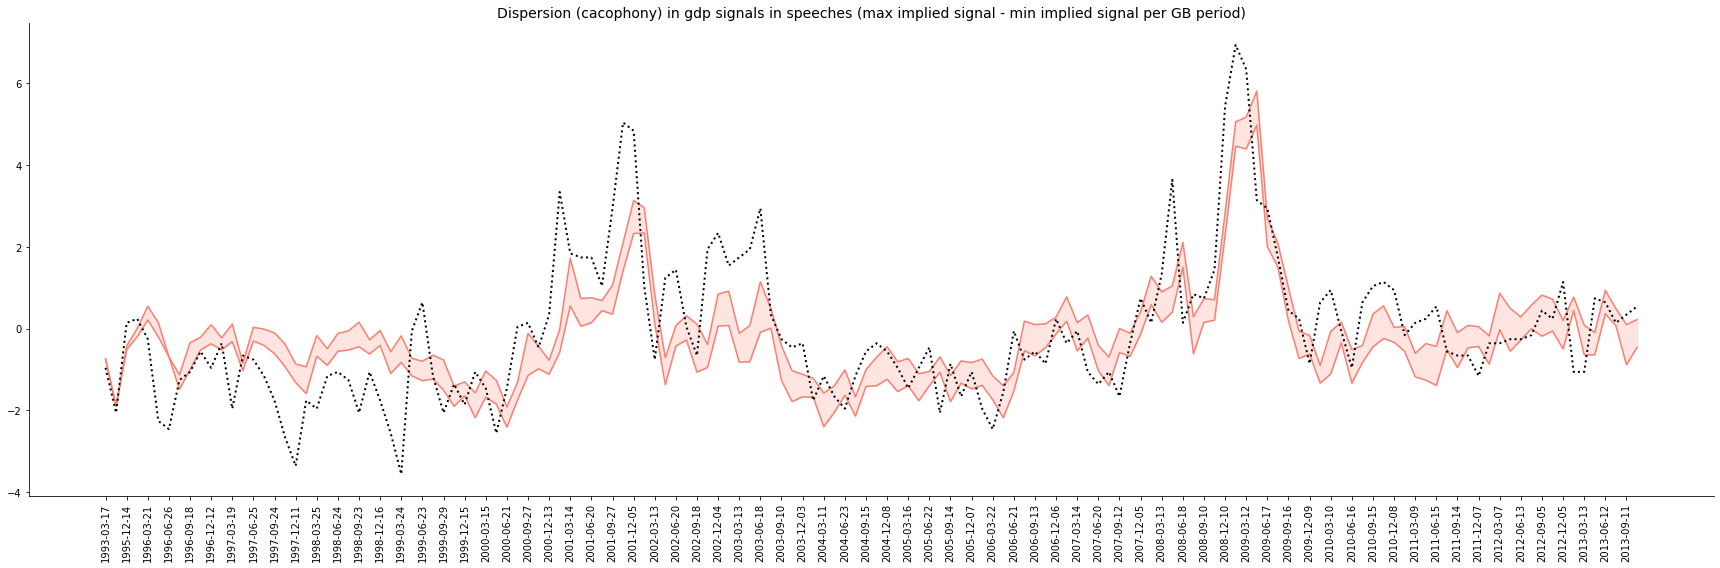

In [197]:
plt.figure(figsize=(24,8))
plt.plot(df_disp.index, df_disp.max_signal, color = color, linewidth = 1.5)
plt.plot(df_disp.index, df_disp.min_signal, color = color, linewidth = 1.5)
plt.fill_between(df_disp.index, df_disp.min_signal,df_disp.max_signal, color = color, alpha = 0.2)
plt.plot(df_disp.index, df_disp.y_actual, color = "black", linestyle = ":",linewidth = 2)
plt.xticks(df_disp.index[::2], rotation=90)
plt.title("Dispersion (cacophony) in {} signals in speeches (max implied signal - min implied signal per GB period)".format(name), fontsize = 14)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig("/Users/maximilianahrens/OneDrive - Nexus365/Michael and Max/Output_speeches/speech_results/speeches_"+target+"/"+target+"_speech_signal_dispersion.pdf")
plt.show()

## Individual speakers

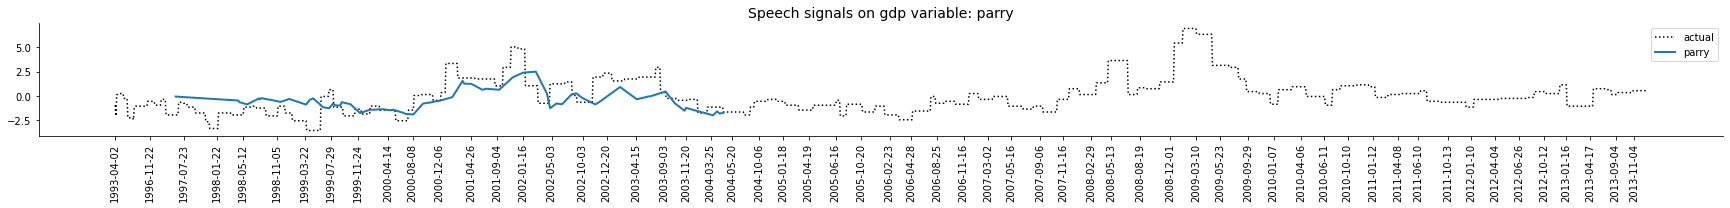

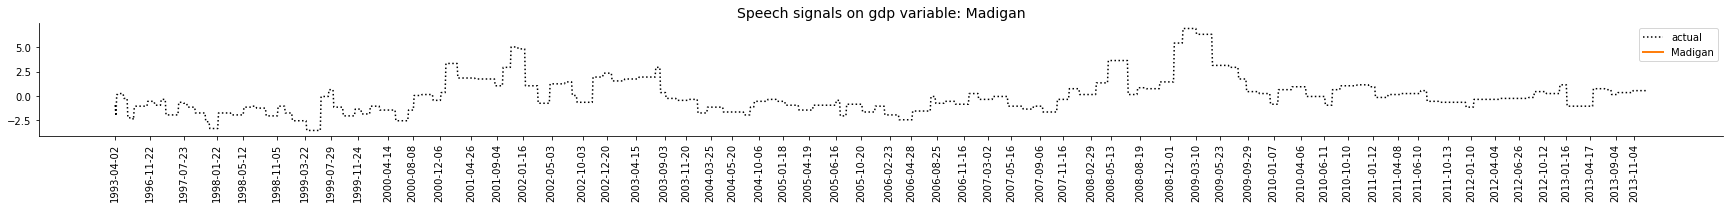

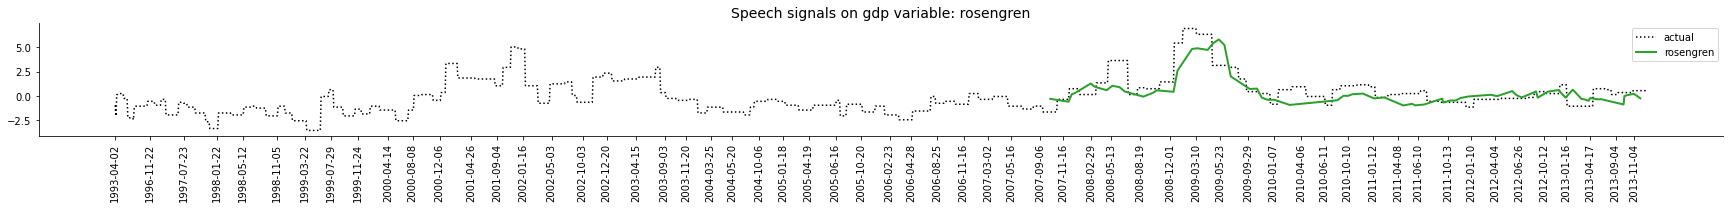

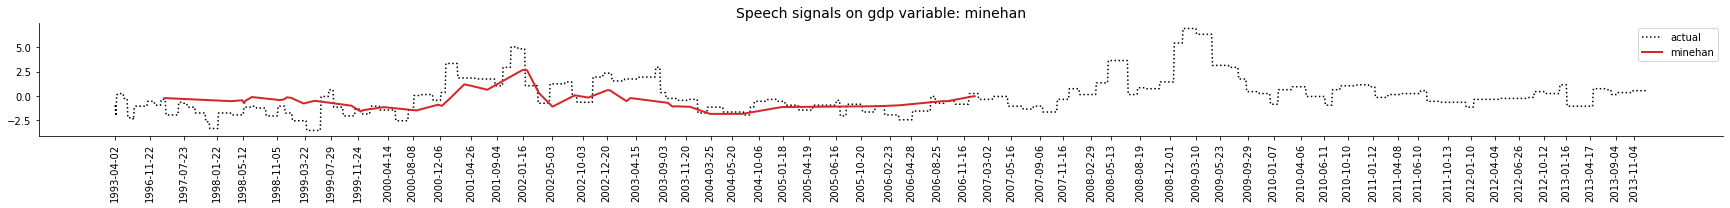

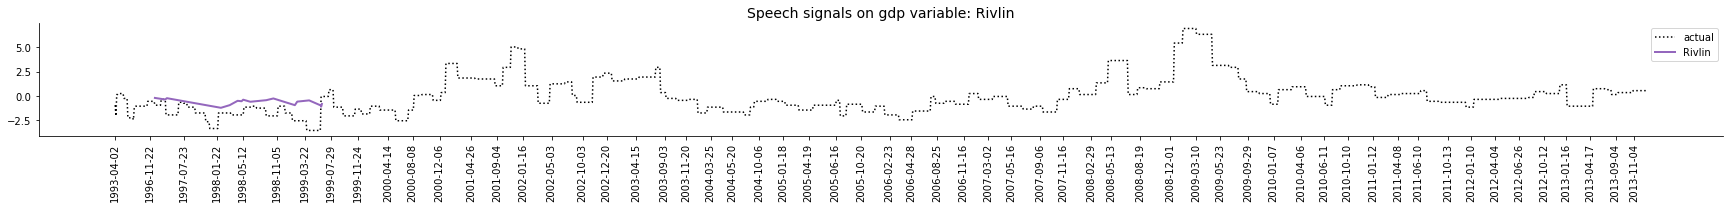

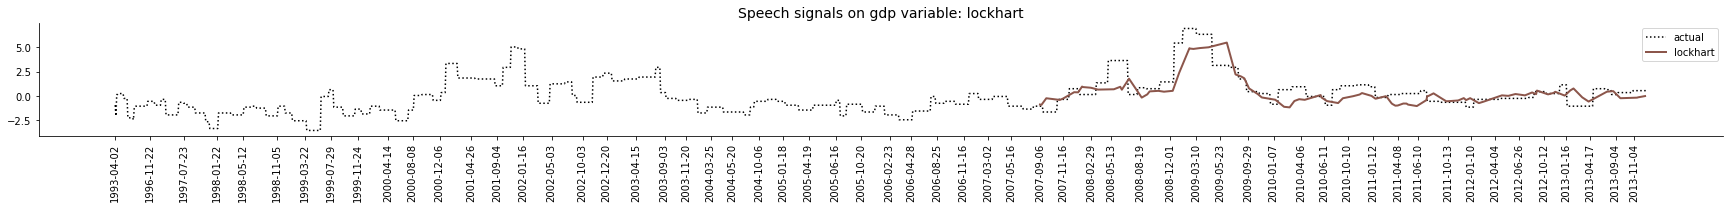

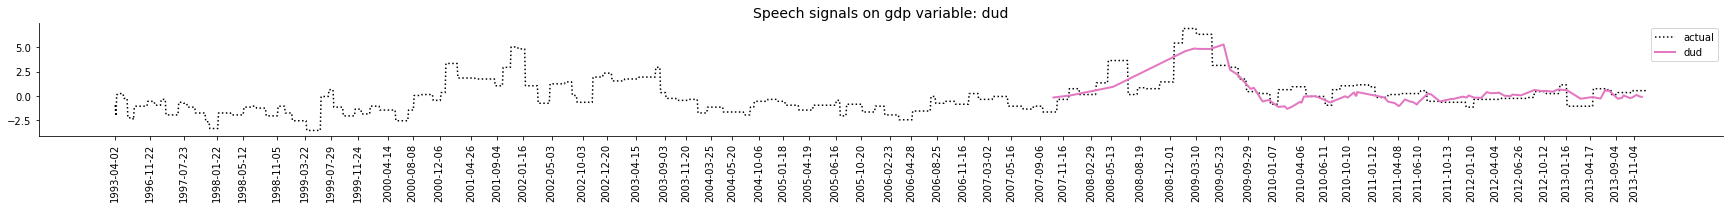

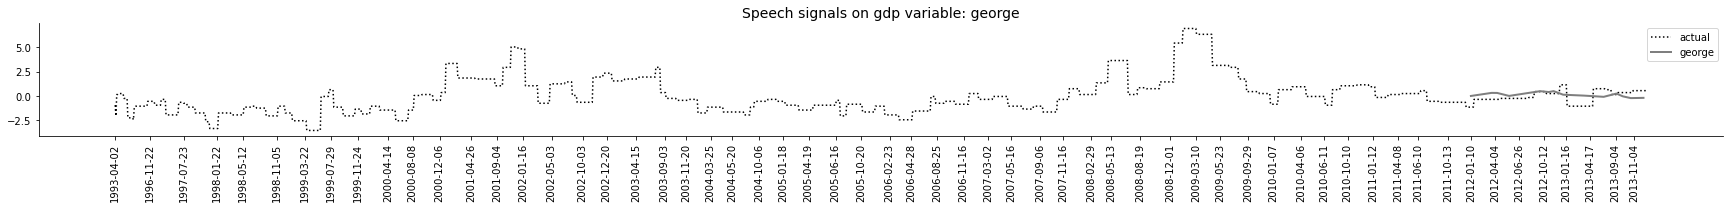

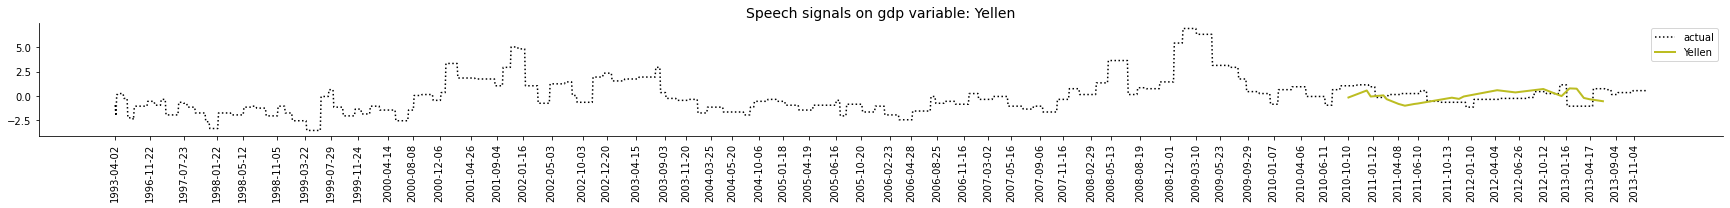

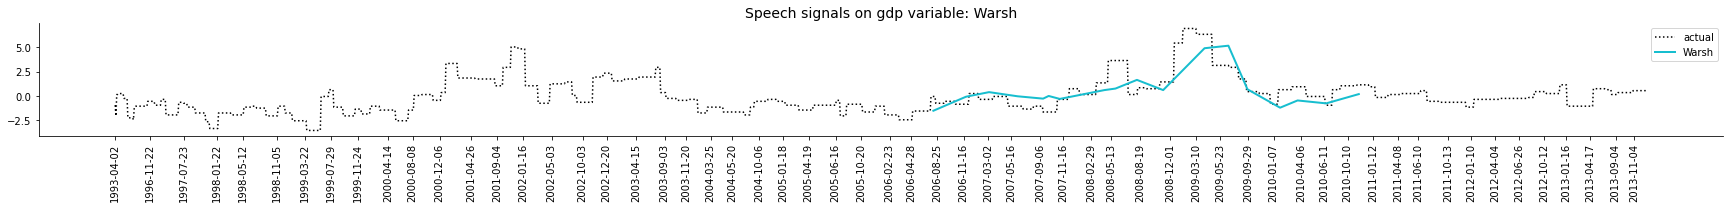

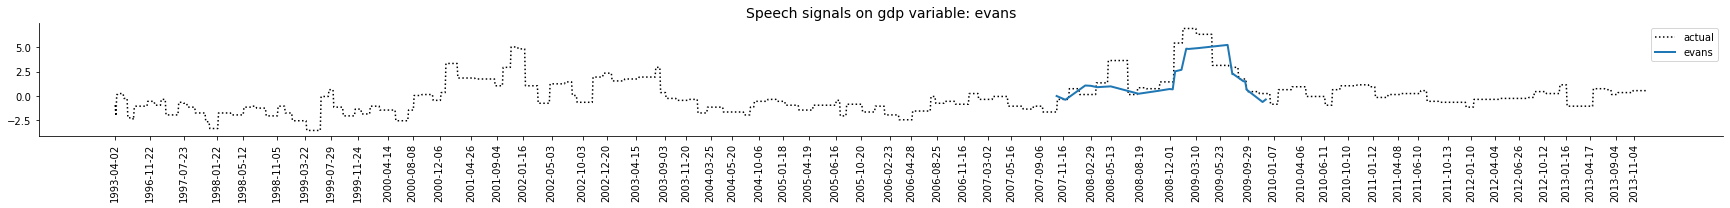

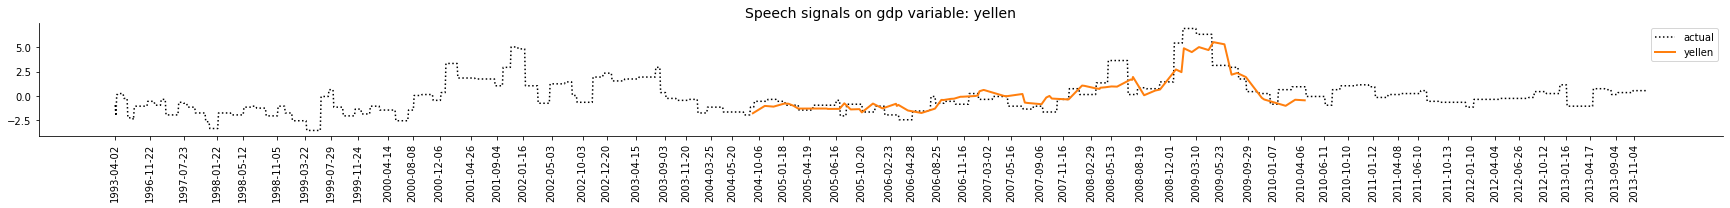

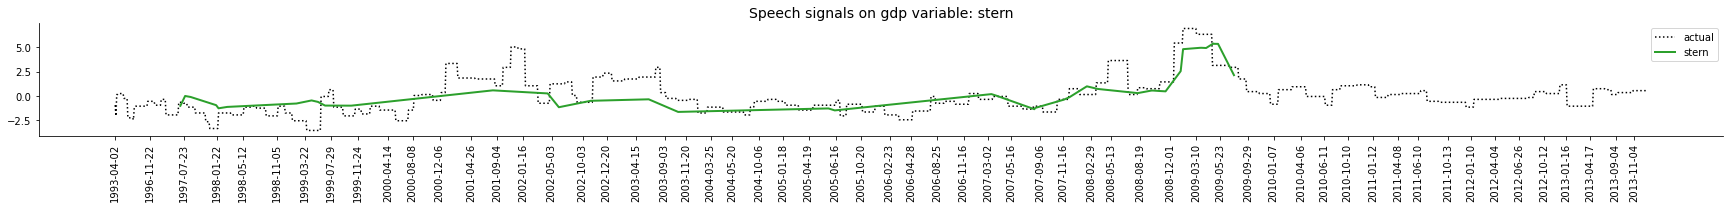

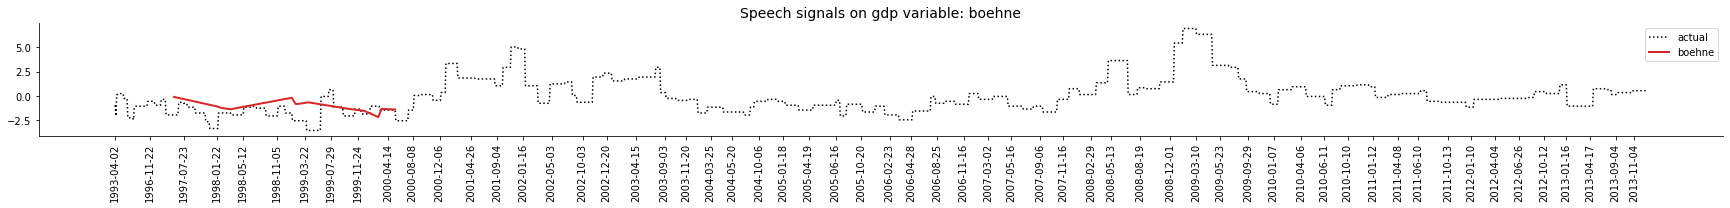

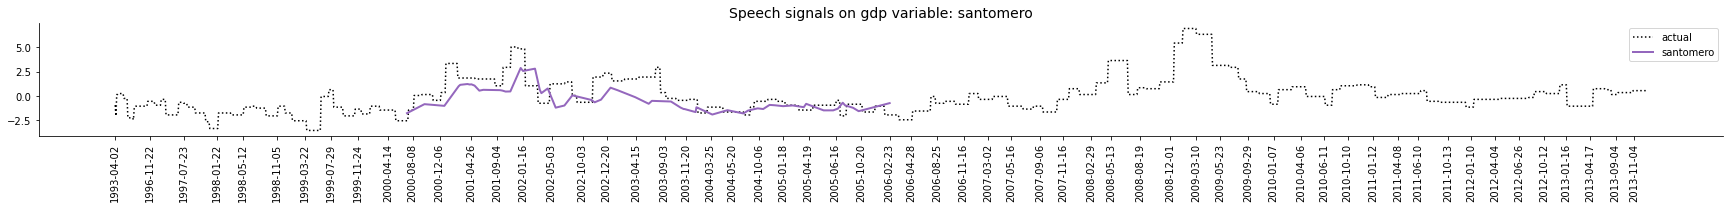

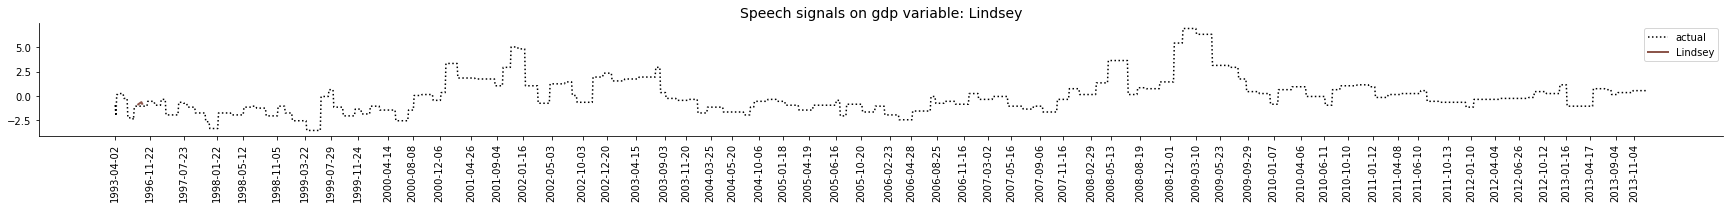

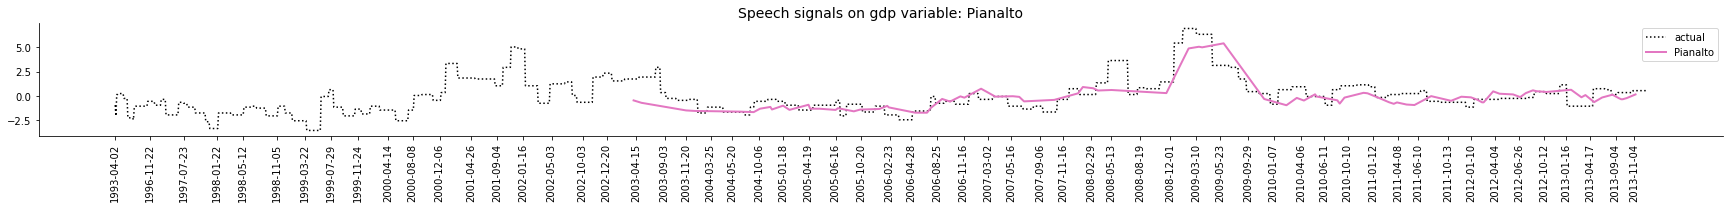

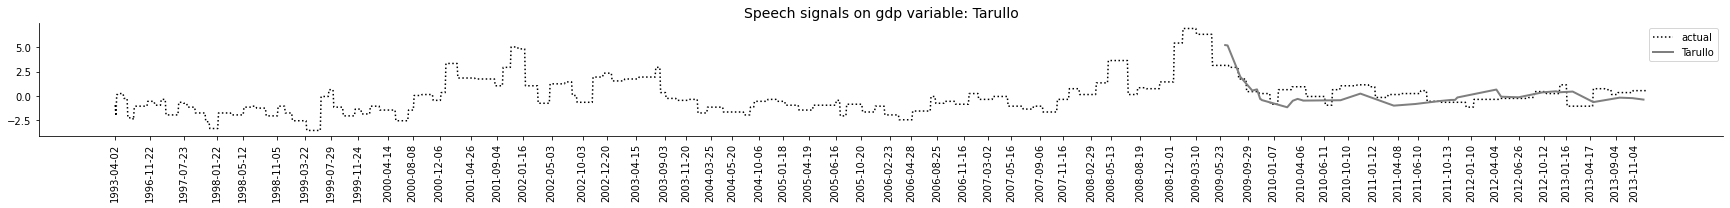

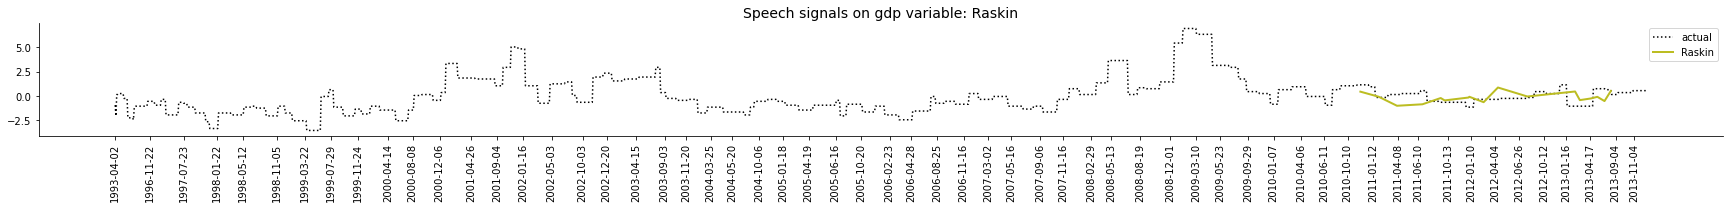

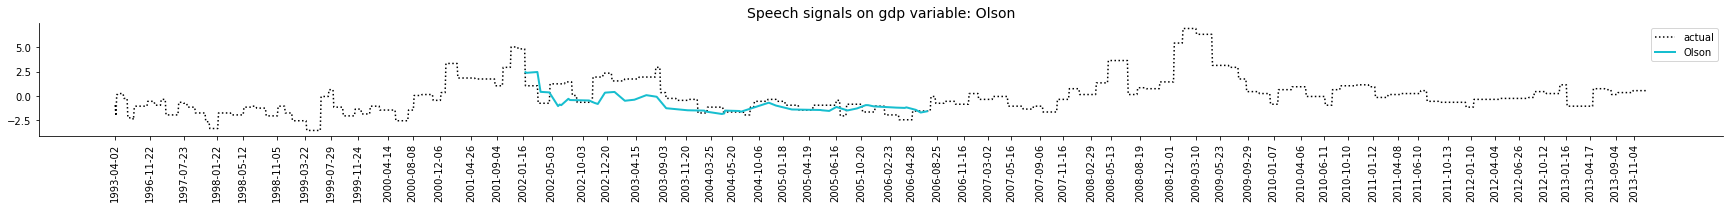

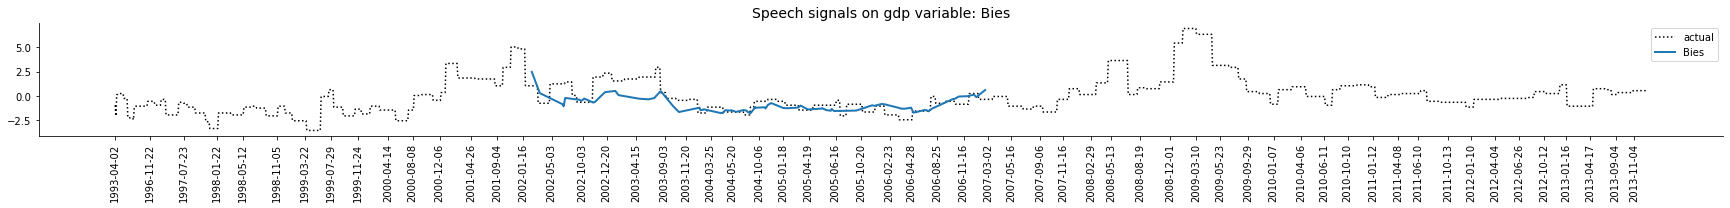

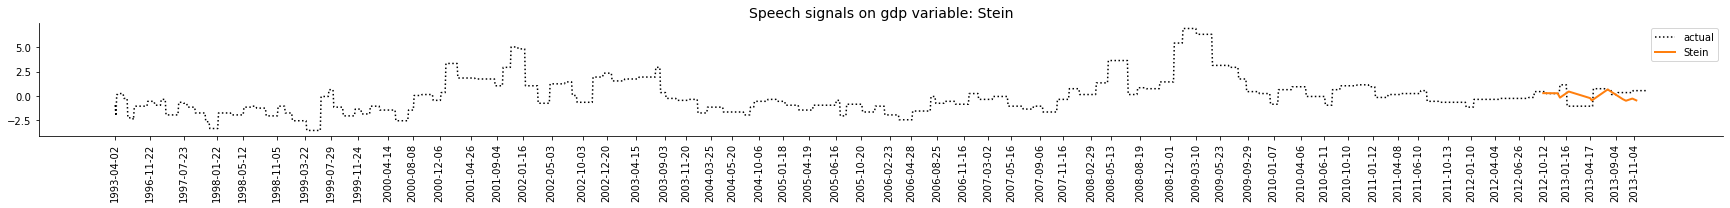

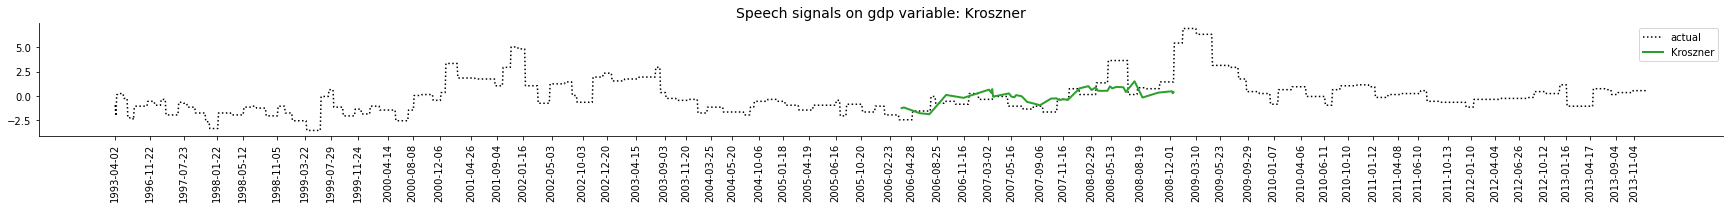

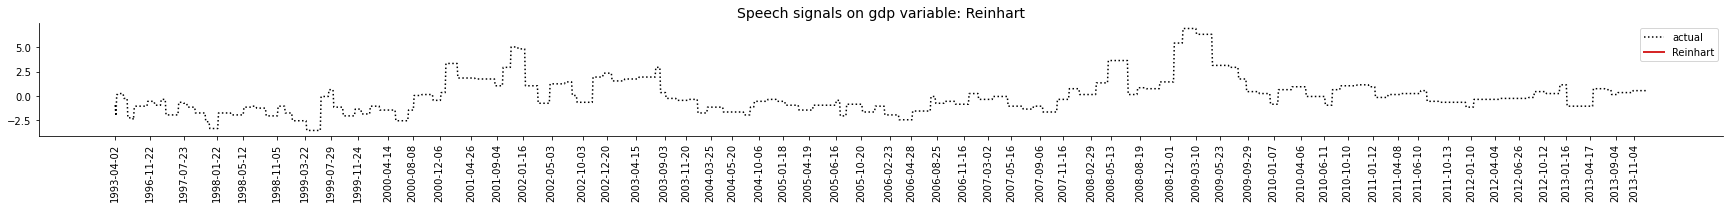

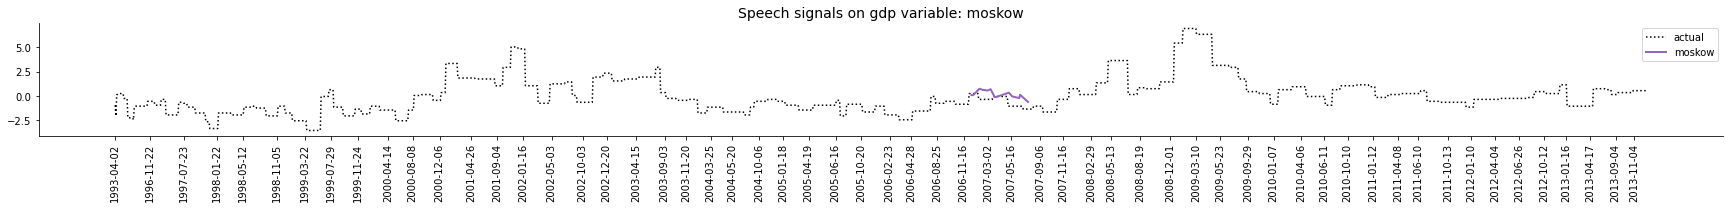

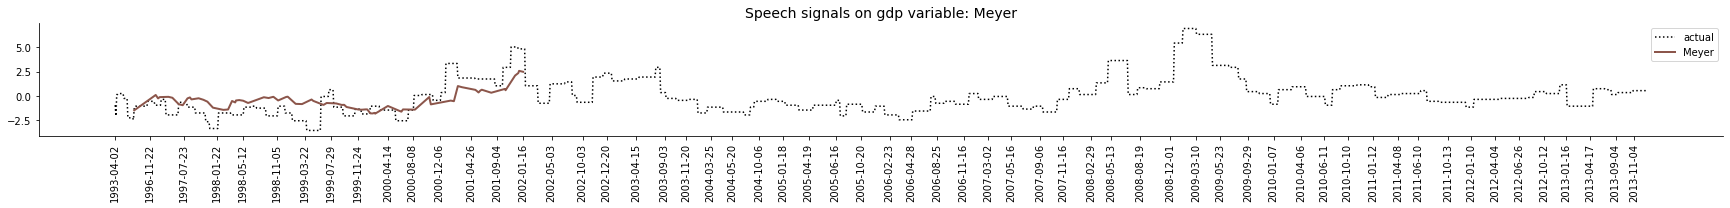

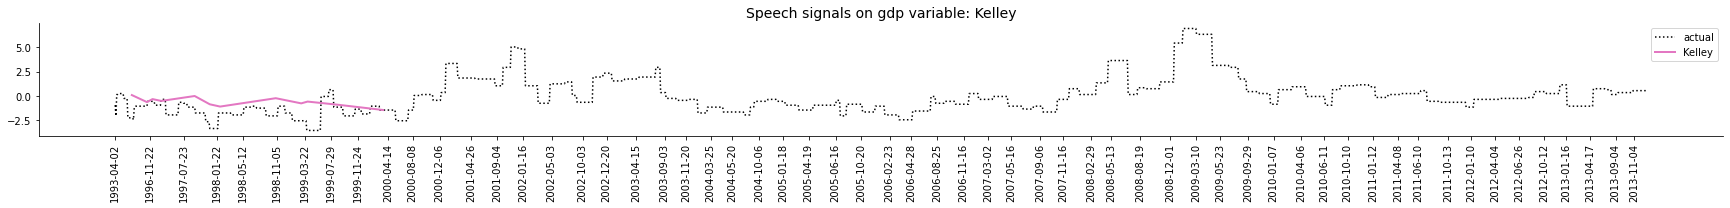

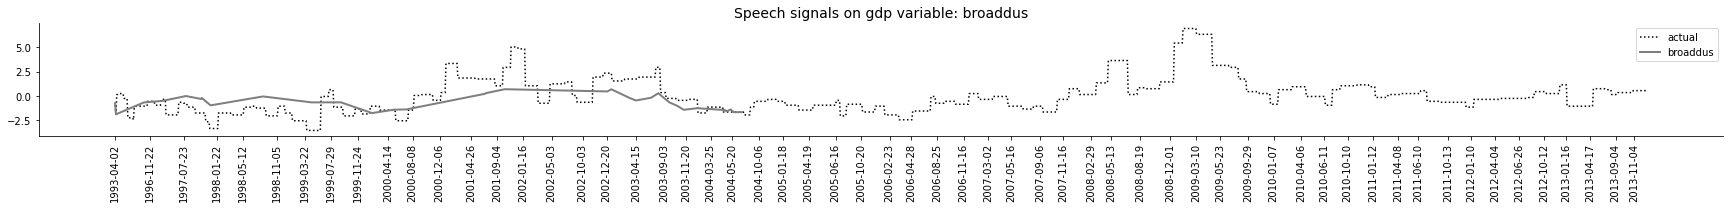

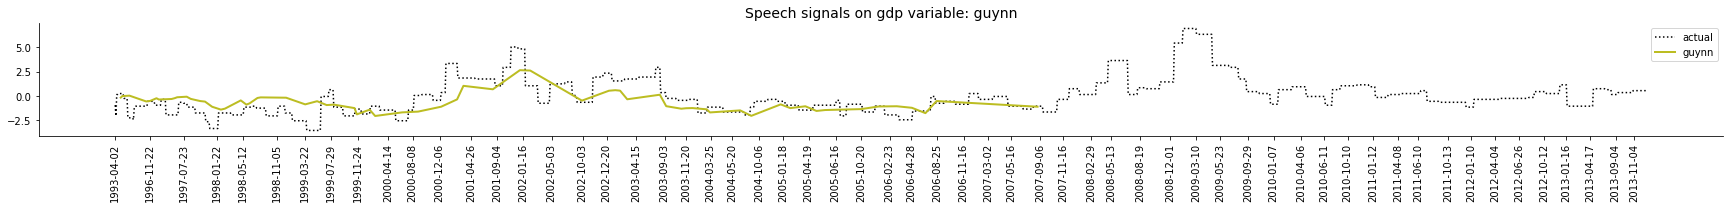

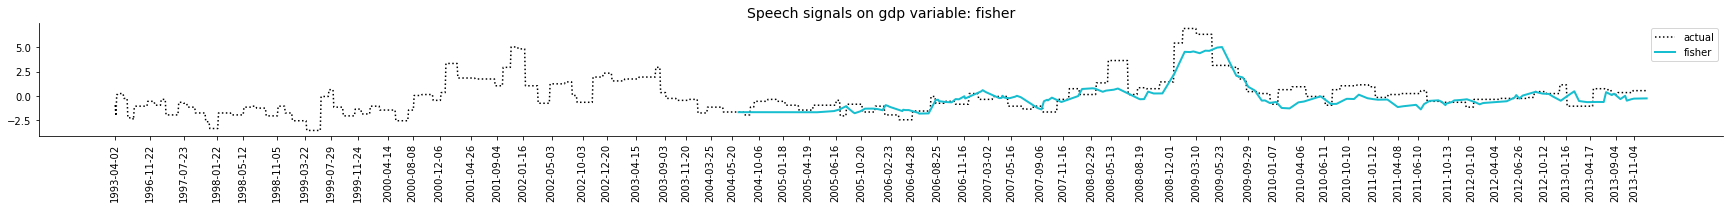

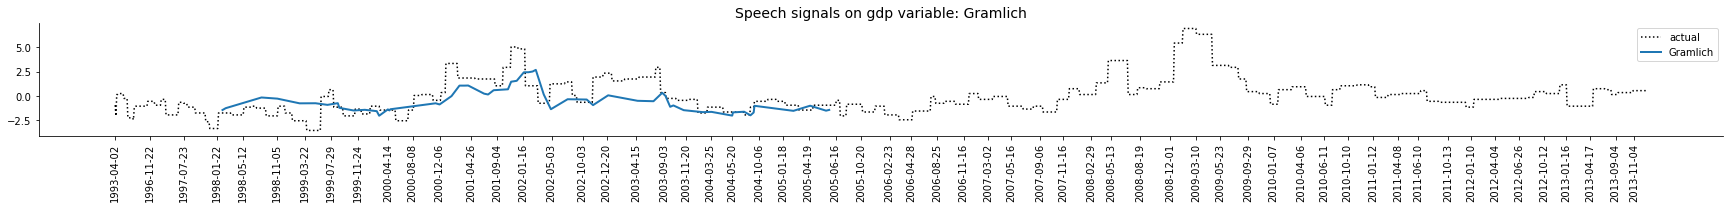

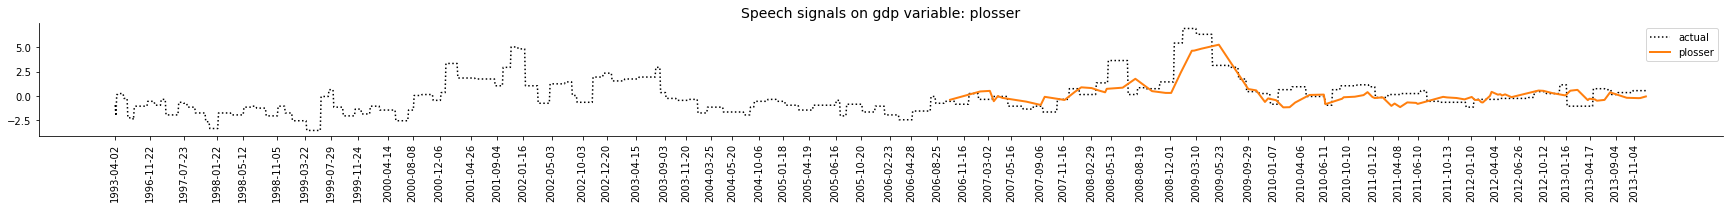

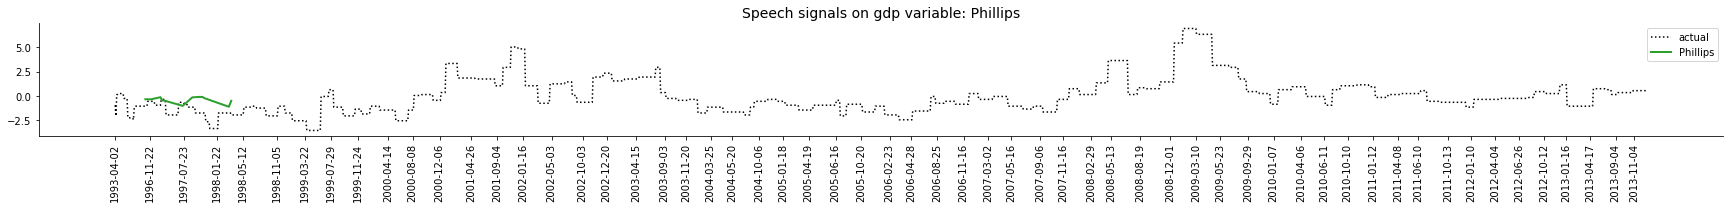

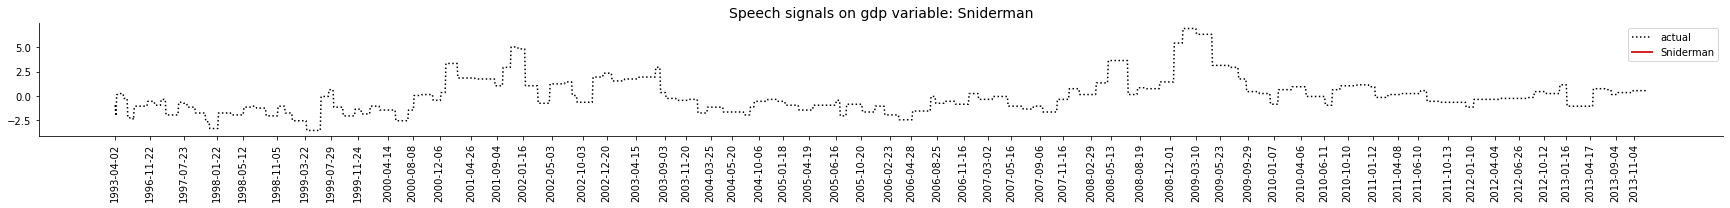

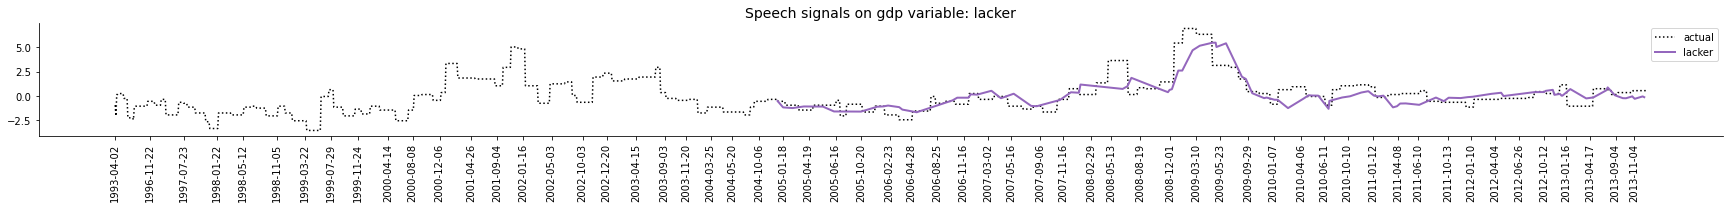

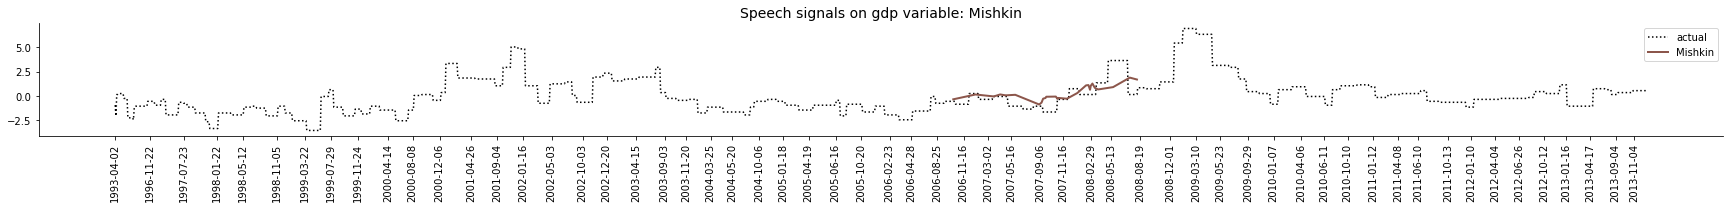

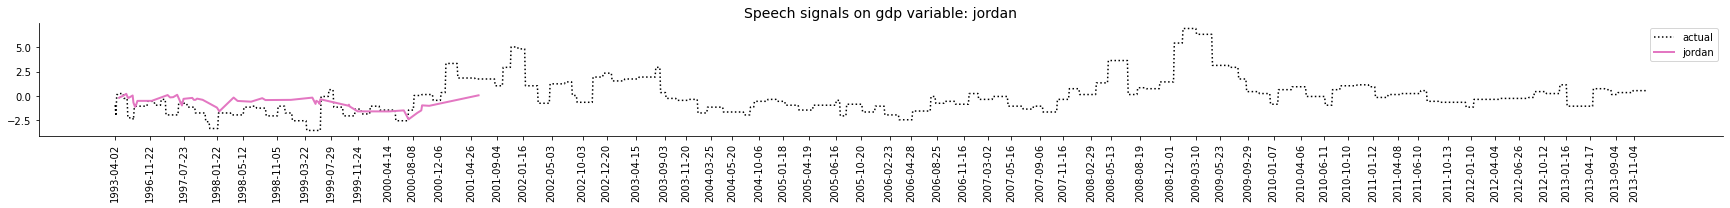

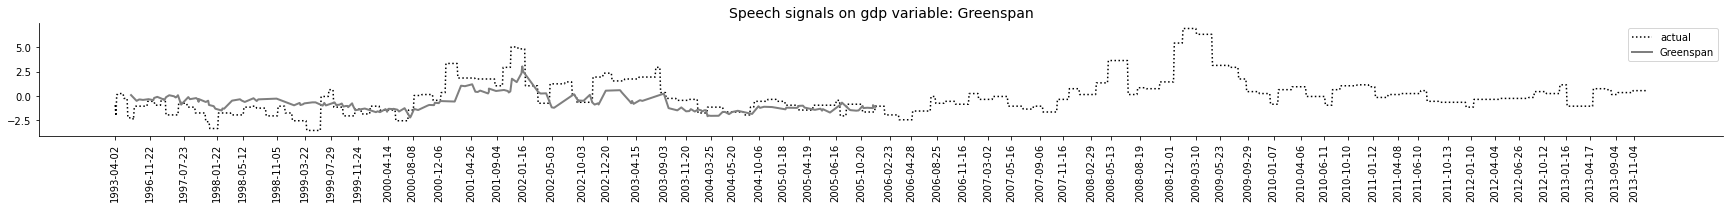

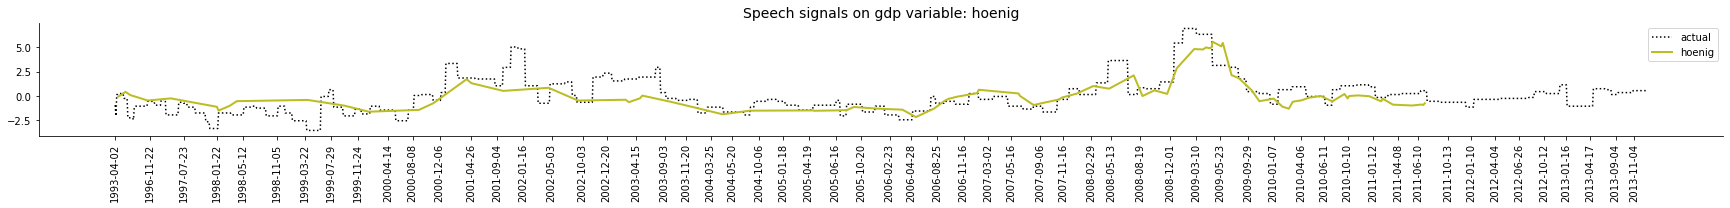

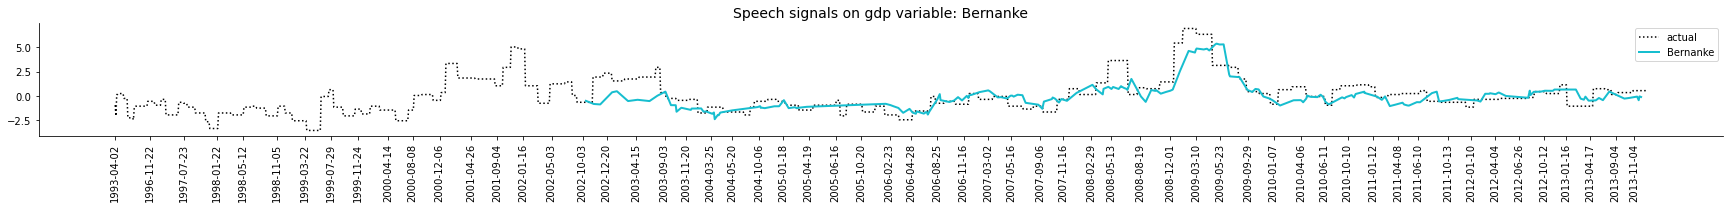

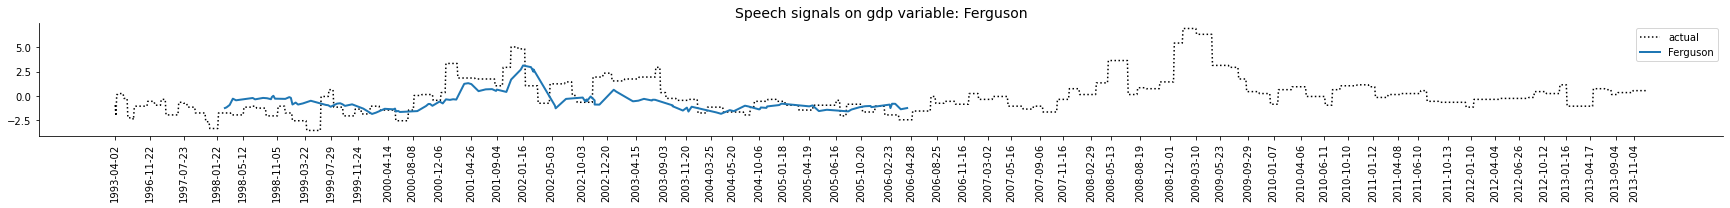

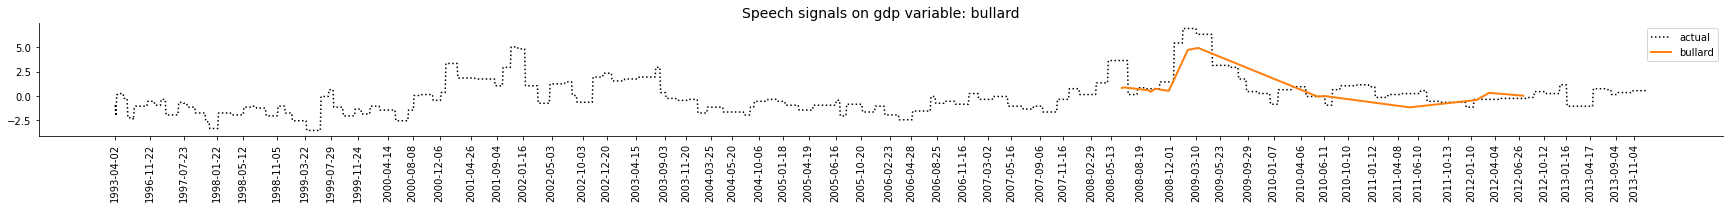

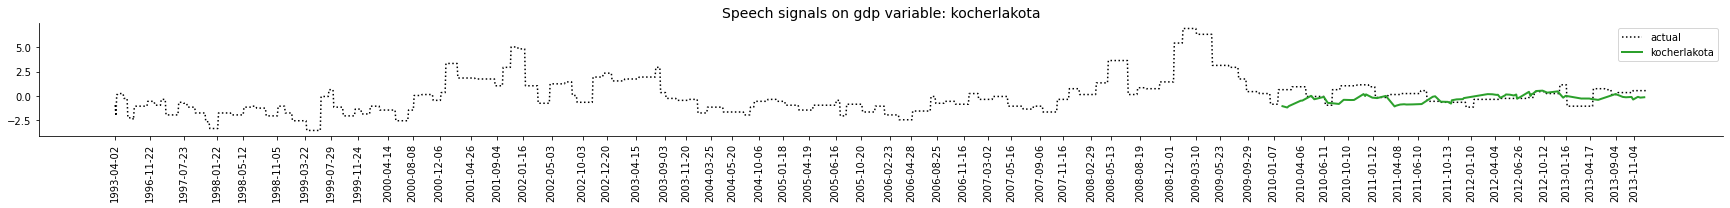

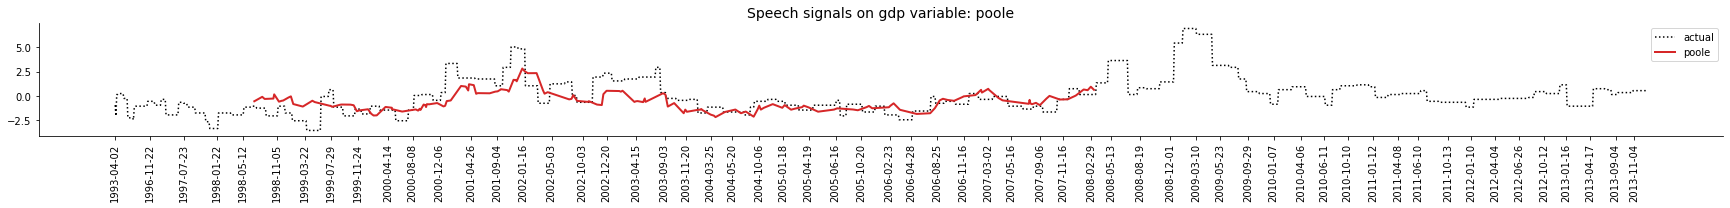

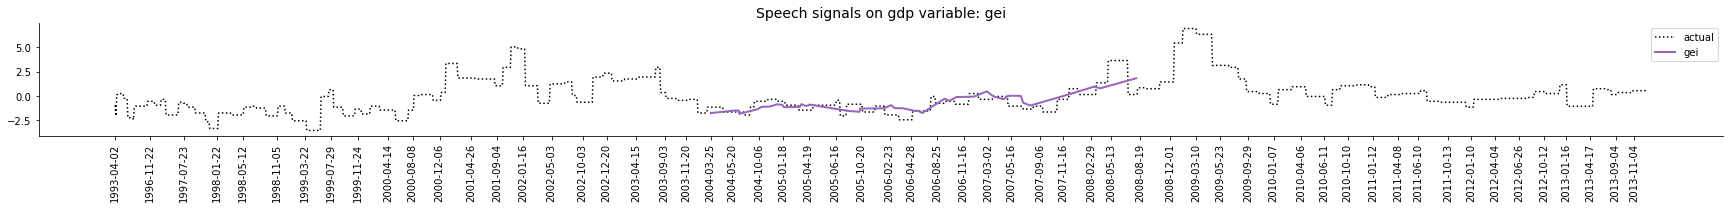

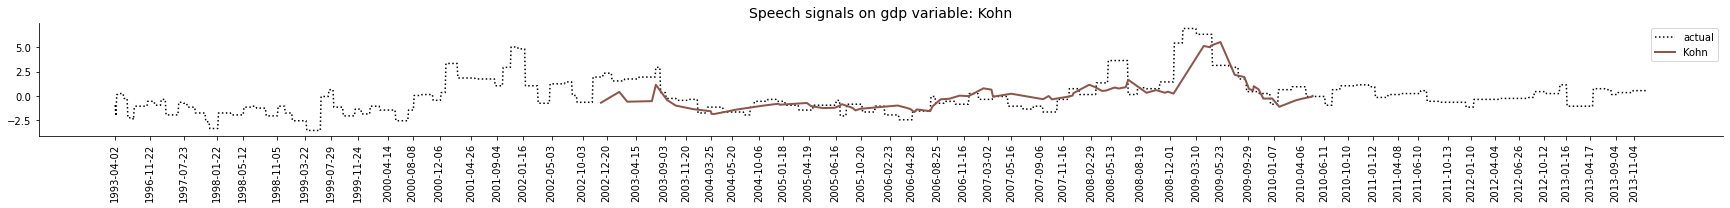

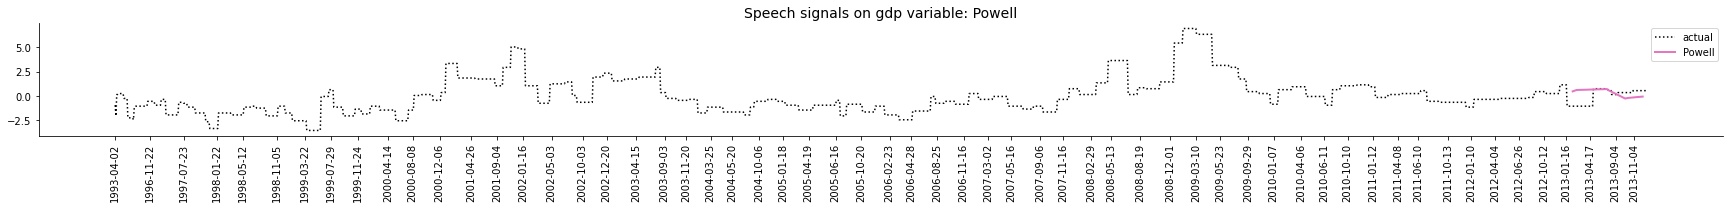

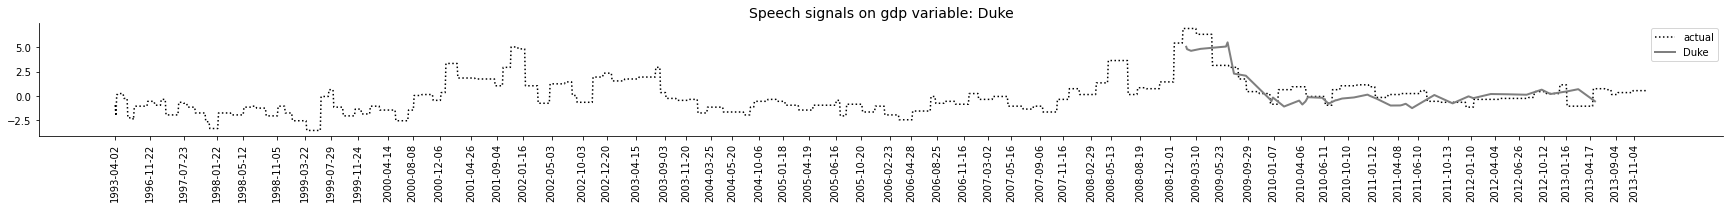

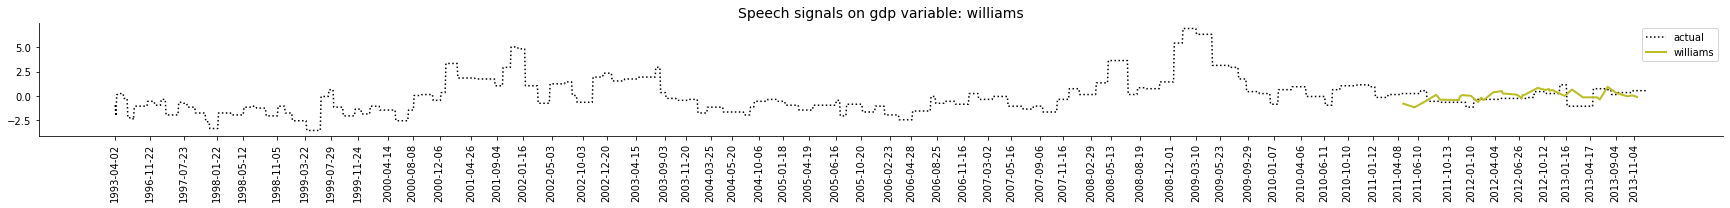

In [198]:
speakers_list = list(set(df_speech_results.speaker) - set(["mc","mcd",np.nan,"pdf","sp"]))
color_multiplier = int(np.ceil(len(speakers_list)/len(sns.color_palette())))
for speaker ,color in zip(speakers_list,sns.color_palette()*color_multiplier):
    plt.figure(figsize=(24,3))
    plt.plot(df_speech_results.date, df_speech_results.y_actual, label = "actual", color = "black", linestyle = ":")
    data = df_speech_results[df_speech_results.speaker == speaker]
    plt.plot(data.date, data.y_speech_implied, color = color, label = speaker, linewidth = 2)
    plt.xticks(df_speech_results.date[::50], rotation=90)
    plt.title("Speech signals on {} variable: {}".format(name, speaker), fontsize = 14)
    plt.legend()
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.tight_layout()
    plt.savefig("/Users/maximilianahrens/OneDrive - Nexus365/Michael and Max/Output_speeches/speech_results/speeches_"+target+"/indiv_speaker_charts/speech_signal_"+target+"_{}.pdf".format(speaker))
    plt.show()

# 